# 1. INTRODUCTION

## DATASET SOURCE

```
The dataset is taken from kaggle.

Credit score classification
by ROHAN PARIS
```

<a href='https://www.kaggle.com/datasets/parisrohan/credit-score-classification/data?select=train.csv'> LINK DATASET </a>

## BACKGORUND

```
Assumed role :
Data Scientist working at Global Finance Company.

Assumed background :
The management wants to create an intelligent system to categorize individuals into credit score brackets to help the company make smarter, faster, and more profitable decisions.
```

## PROBLEM

```
The company I currently work for still relies on a manual process to assess and categorize individuals into credit score brackets. This process is time-consuming, error-prone, and inconsistent, leading to inefficient decision-making, higher operational costs, and delays in offering personalized financial products.

To solve the problem, the company's management asked me as a data scientist to create a machine learning model that could automatically categorize individuals into credit score brackets. The goal was to create a model that accurately and efficiently classifies individuals based on their creditworthiness, reducing manual effort and increasing the speed and accuracy of credit scoring. By implementing this automated solution, companies will be able to make smarter, faster, and more profitable decisions while ensuring compliance with regulatory standards and improving customer satisfaction.
```

## GOALS

```
The goal is to develop a machine learning model that categorizes individuals into credit score brackets (Good, Standard, and Poor), helping the company make more informed lending decisions.
```

## JUSTIFICATION

```
Credit scores play a critical role in evaluating a customer's creditworthiness, allowing financial companies to assess risk, and set appropriate loan regulations. Customers with good credit scores are considered low-risk and typically receive better financial terms, while those with poor credit scores are viewed as high-risk, often facing higher interest rates or loan rejections.

Categorizing customers based on their credit scores enables lenders to make faster, data-driven decisions, improving efficiency and ensuring more personalized financial offerings. However, the traditional manual process of categorizing customers into credit score brackets is time-consuming and prone to human error and inconsistency, leading to inefficiencies and higher operational costs.

By automating this process with a machine learning model, the company can significantly enhance the accuracy, speed, and scalability of credit score classification.
```

```
Reference :
- https://fastercapital.com/topics/the-role-of-credit-scores-in-creditworthiness-evaluation.html
- https://riskseal.io/blog/what-is-alternative-credit-scoring-and-how-does-it-differ-from-the-traditional#toc-why-financial-inclusion-needs-alternative-data-beyond-the-traditional
- https://www.brex.com/resources/what-is-business-credit-score
```

## USAGE

```
Loan Approval and Risk Assessment
The machine learning model helps the company evaluate the risk of lending to individuals by categorizing them based on their credit scores.

Interest Rates
Individuals with higher credit scores get better loan terms, while those with lower scores are seen as riskier and may face higher interest rates.

Personalized Financial Offerings
The model lets the company offer customized financial products, like loans or credit cards, with terms based on each customer's credit score. Higher scores lead to better offers, while lower scores may require higher rates or extra security.

Profitability
By categorizing customers, the company can manage its portfolio more effectively. They can focus on offering high-value services to customers with good credit, while also managing the risk associated with those who have poor credit.
```

# 2. IMPORT LIBRARIES

In [121]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistic
import scipy.stats as stats

# Handling Outliers
from feature_engine.outliers import Winsorizer

# Split Train-Test
from sklearn.model_selection import train_test_split

# Pipeline untuk model
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# Machine Learning
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import f1_score

# Model Saving
import pickle

# 3. DATA LOADING

In [2]:
df = pd.read_csv('credit_score.csv')

/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_34153/1870558350.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('credit_score.csv')


# 4. EXPLORATORY DATA ANLYSIS (EDA)

## DATA CONTENT

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## DATA INFORMATION

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [7]:
df.describe(include='object').T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


```
After obtaining data information, we can see that :
- there are multiple missing values in the data :
Name : 9985 missing values
Monthly_Inhand_Salary : 15002 missing values
Type_of_Loan : 11408 missing values
Num_of_Delayed_Payment : 7002 missing values
Num_Credit_Inquiries : 1965 missing values
Credit_History_Age : 9030 missing values
Amount_invested_monthly : 4479 missing values
Monthly_Balance : 1200 missing values
Occupation, CreditMix has value '__'

- there are multiple numerical columns that show as categorical :
Age should be integer
Annual_Income should be float
Num_of_Loan should be integer
Num_of_Delayed_Payment should be integer
Changed_Credit_Limit should be float
Amount_invested_monthly should be float
Outstanding_Debt should be float
Monthly_Balance should be float

- there are multiple wrong entries
Num_Bank_Accounts have very high maximum value, and its minimum value is negative value. This variable can't be negative.
Num_Credit_Card have very high maximum value.
Num_of_Loan have a negative value. This variable can't be negative.

- there are multiple high cardinality categorical columns
ID, Customer_ID, Name, SSN
```

### DATA DIMENSION

```
This dataset contains :
column  : 28
row     : 10000
```

### COLUMN INFORMATION

```
Dataset columns information :

ID: Unique ID of the record
Customer_ID: Unique ID of the customer
Month: Month of the year
Name: The name of the customer
Age: The age of the customer
SSN: Social Security Number of the customer
Occupation: The occupation of the customer
Annual_Income: The Annual Income of the customer
Monthly_Inhand_Salary: Monthly in-hand salary of the customer
Num_Bank_Accounts: The number of bank accounts of the customer
Num_Credit_Card: Number of credit cards the customer is having
Interest_Rate: The interest rate on the credit card of the customer
Num_of_Loan: The number of loans taken by the customer from the bank
Type_of_Loan: The types of loans taken by the customer from the bank
Delay_from_due_date: The average number of days delayed by the customer from the date of payment
Num_of_Delayed_Payment: Number of payments delayed by the customer
Changed_Credit_Card: The percentage change in the credit card limit of the customer
Num_Credit_Inquiries: The number of credit card inquiries by the customer
Credit_Mix: Classification of Credit Mix of the customer
Outstanding_Debt: The outstanding balance of the customer
Credit_Utilization_Ratio: The credit utilization ratio of the credit card of the customer
Credit_History_Age: The age of the credit history of the customer
Payment_of_Min_Amount: Yes if the customer paid the minimum amount to be paid only, otherwise no.
Total_EMI_per_month: The total EMI per month of the customer
Amount_invested_monthly: The monthly amount invested by the customer
Payment_Behaviour: The payment behaviour of the customer
Monthly_Balance: The monthly balance left in the account of the customer
Credit_Score: The person’s credit score (target variable: 'Good,' 'Poor,' 'Standard').
```

## DATA VISUALIZATION

/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_34153/1627307718.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Month'], ax=axis[0], palette='icefire')
/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_34153/1627307718.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Occupation'], ax=axis[1], palette='icefire')
/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_34153/1627307718.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Credit_Mix'], ax=axis[2], palette='icefire')
/var/fol

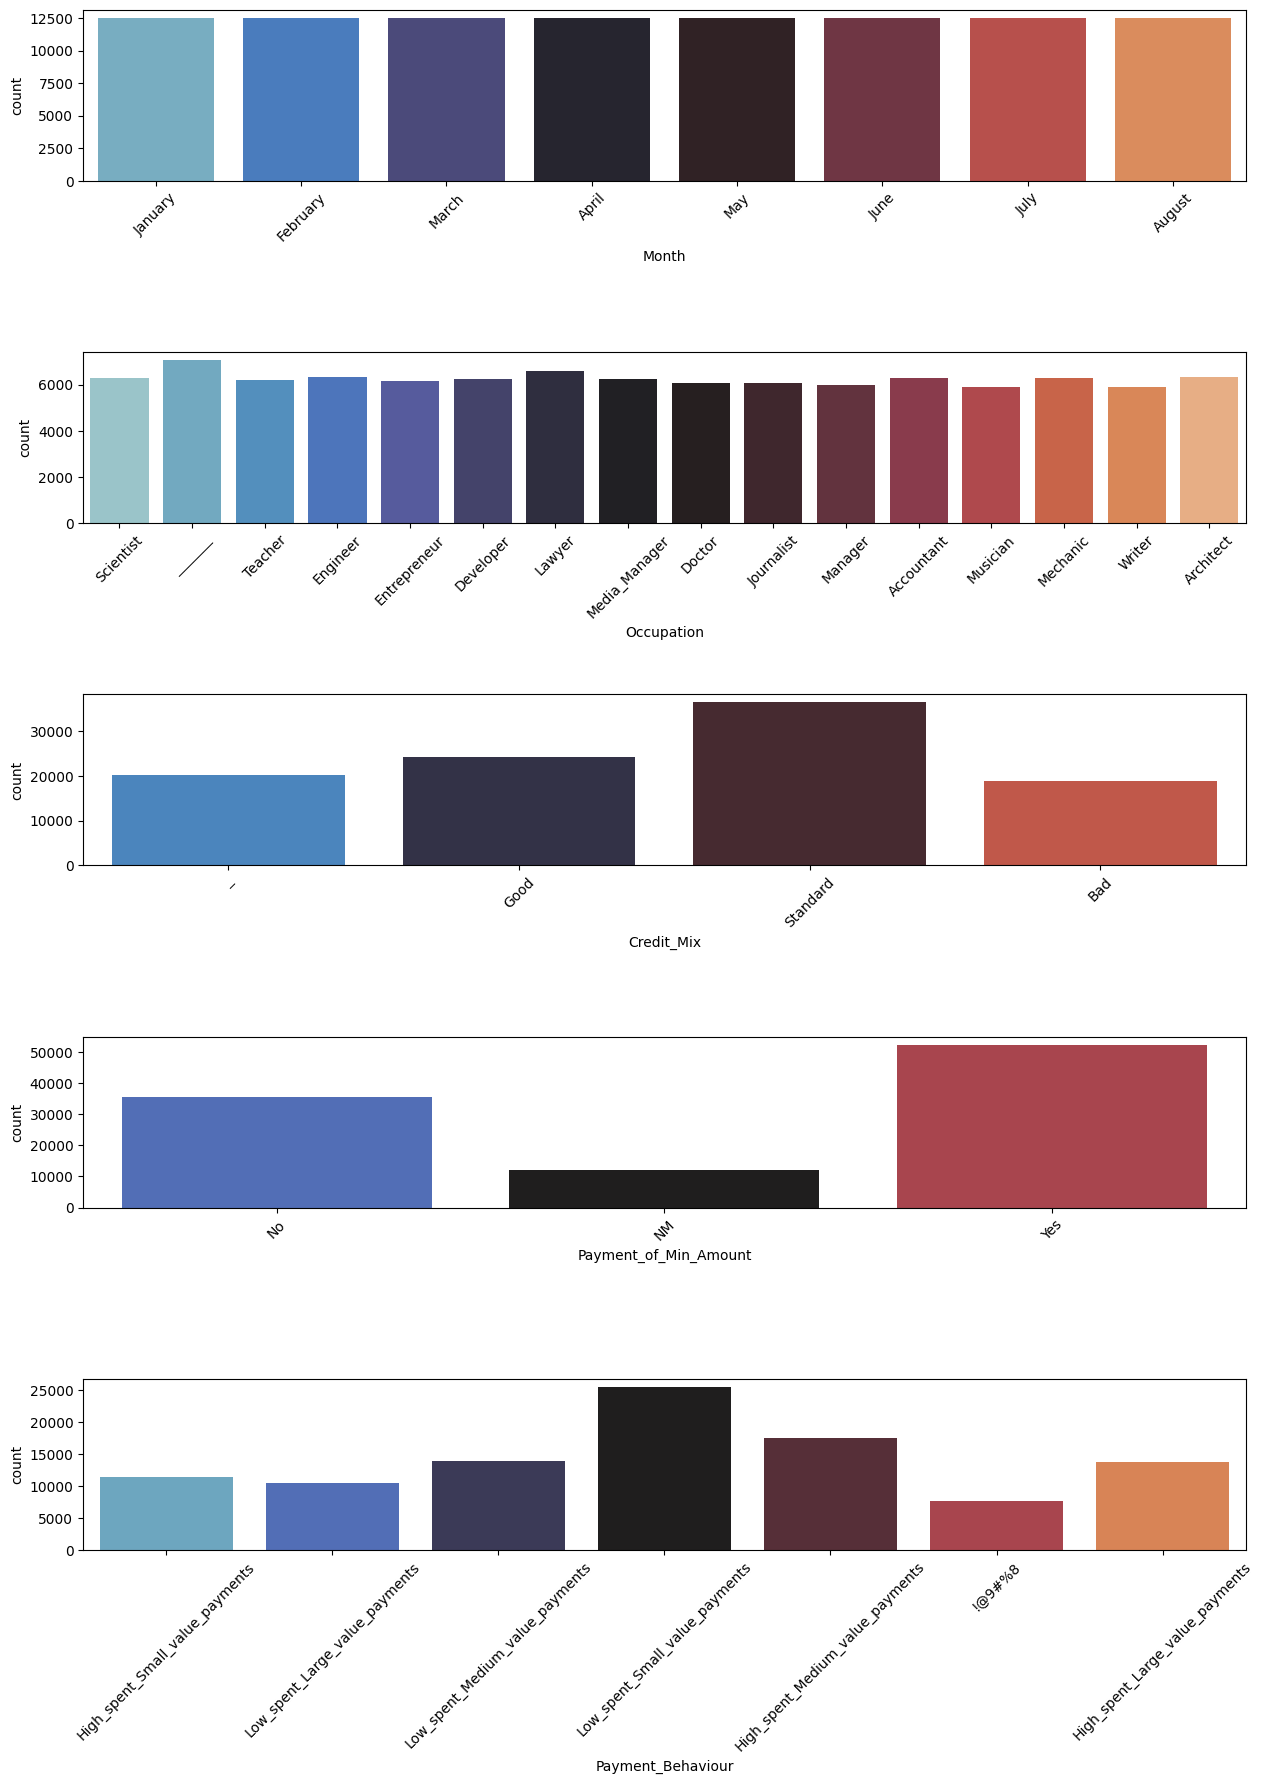

In [8]:
fig, axis = plt.subplots(nrows=5, ncols=1, figsize=(15,20))
fig.subplots_adjust(hspace=1)

sns.countplot(x=df['Month'], ax=axis[0], palette='icefire')
axis[0].tick_params(axis='x', rotation=45)

sns.countplot(x=df['Occupation'], ax=axis[1], palette='icefire')
axis[1].tick_params(axis='x', rotation=45)

sns.countplot(x=df['Credit_Mix'], ax=axis[2], palette='icefire')
axis[2].tick_params(axis='x', rotation=45)

sns.countplot(x=df['Payment_of_Min_Amount'], ax=axis[3], palette='icefire')
axis[3].tick_params(axis='x', rotation=45)

sns.countplot(x=df['Payment_Behaviour'], ax=axis[4], palette='icefire')
axis[4].tick_params(axis='x', rotation=45)

plt.show()

/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_34153/309549588.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Monthly_Inhand_Salary'], ax=axis[0])
/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_34153/309549588.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d

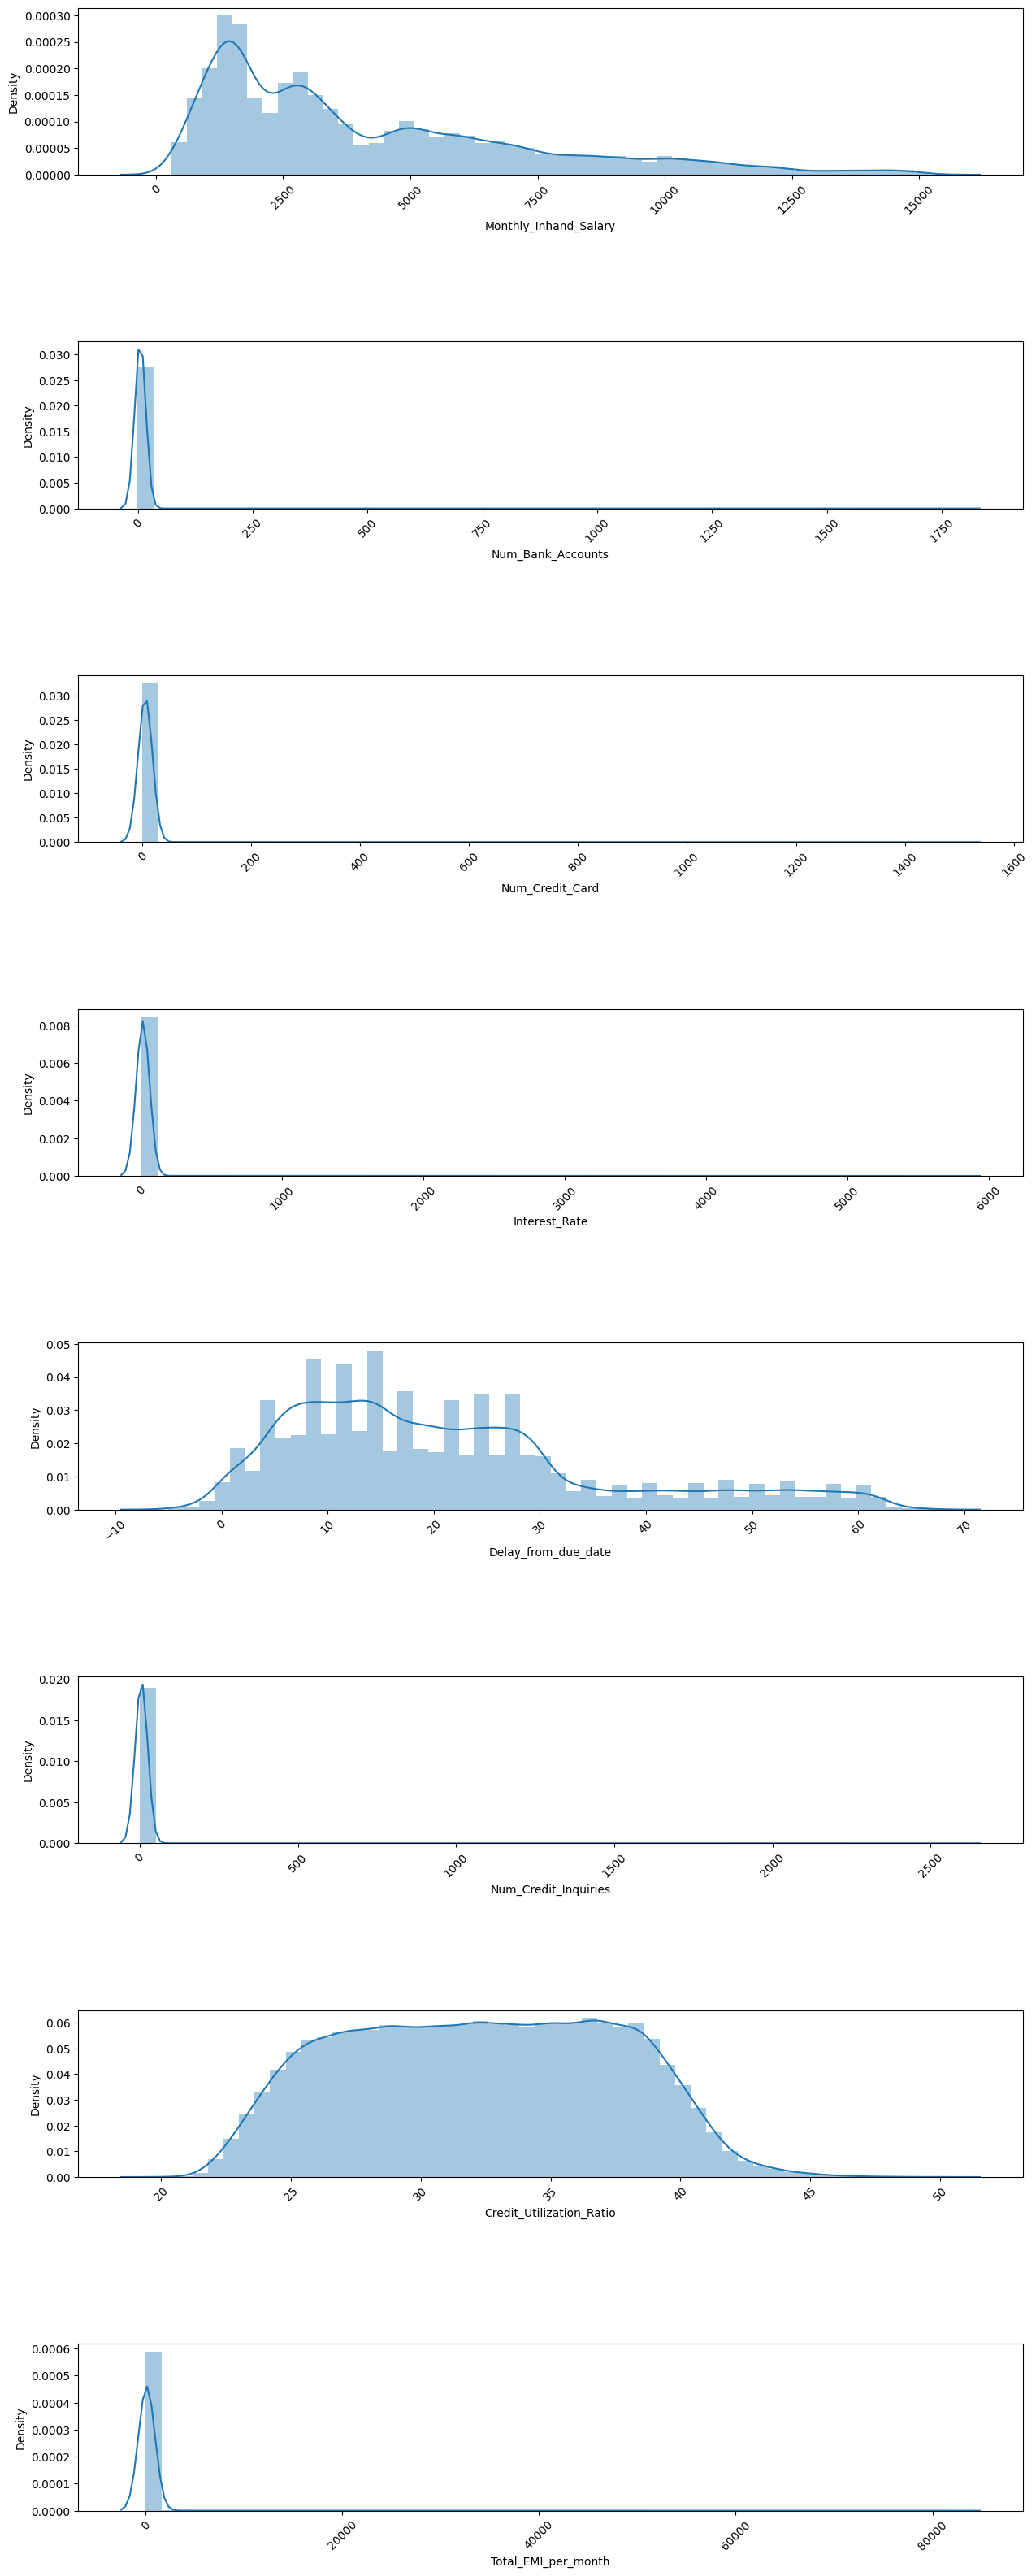

In [9]:
fig, axis = plt.subplots(nrows=8, ncols=1, figsize=(15,40))
fig.subplots_adjust(hspace=1)

sns.distplot(df['Monthly_Inhand_Salary'], ax=axis[0])
axis[0].tick_params(axis='x', rotation=45)

sns.distplot(df['Num_Bank_Accounts'], ax=axis[1])
axis[1].tick_params(axis='x', rotation=45)

sns.distplot(df['Num_Credit_Card'], ax=axis[2])
axis[2].tick_params(axis='x', rotation=45)

sns.distplot(df['Interest_Rate'], ax=axis[3])
axis[3].tick_params(axis='x', rotation=45)

sns.distplot(df['Delay_from_due_date'], ax=axis[4])
axis[4].tick_params(axis='x', rotation=45)

sns.distplot(df['Num_Credit_Inquiries'], ax=axis[5])
axis[5].tick_params(axis='x', rotation=45)

sns.distplot(df['Credit_Utilization_Ratio'], ax=axis[6])
axis[6].tick_params(axis='x', rotation=45)

sns.distplot(df['Total_EMI_per_month'], ax=axis[7])
axis[7].tick_params(axis='x', rotation=45)

plt.show()

## CHECK DUPLICATES

In [10]:
df.duplicated().sum()

np.int64(0)

```
There's no duplicated data.
```

## CHECK TARGET BALANCE

In [11]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_34153/118215584.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Credit_Score'],palette='icefire');


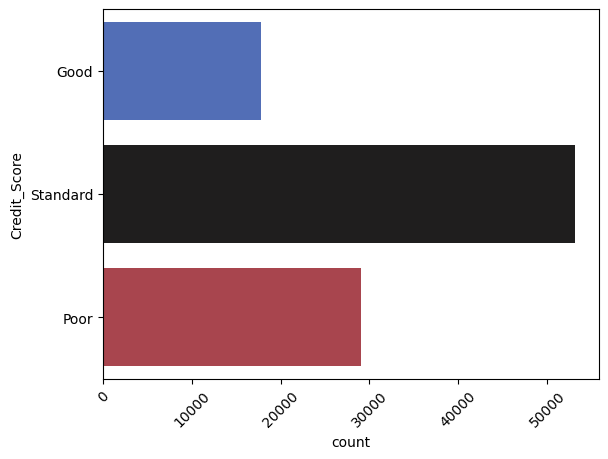

In [12]:
sns.countplot(df['Credit_Score'],palette='icefire');
plt.xticks(rotation=45);

```
After checking target value counts we can see that target columns is imbalanced.
```

# 5. FEATURE ENGINEERING

## CREATE DATASET COPY

In [13]:
data = df.copy()

## DATA CLEANING

### FIX DATA TYPE

#### Age

In [14]:
data['Age'].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [15]:
data['Age'] = data['Age'].str.replace('_','', regex=True)
data['Age'] = data['Age'].astype('int64')
data['Age']

0         23
1         23
2       -500
3         23
4         23
        ... 
99995     25
99996     25
99997     25
99998     25
99999     25
Name: Age, Length: 100000, dtype: int64

```
Age column has had its data type corrected to int64 but as seen in the data above there are unnatural values.
```

#### Annual_Income

In [16]:
data['Annual_Income'].unique()

array(['19114.12', '34847.84', '34847.84_', ..., '20002.88', '39628.99',
       '39628.99_'], dtype=object)

In [17]:
data['Annual_Income'] = data['Annual_Income'].str.replace('_','', regex=True)
data['Annual_Income'] = data['Annual_Income'].astype('float64')
data['Annual_Income']

0        19114.12
1        19114.12
2        19114.12
3        19114.12
4        19114.12
           ...   
99995    39628.99
99996    39628.99
99997    39628.99
99998    39628.99
99999    39628.99
Name: Annual_Income, Length: 100000, dtype: float64

#### Num_of_Loan

In [18]:
data['Num_of_Loan'].unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

In [19]:
data['Num_of_Loan'] = data['Num_of_Loan'].str.replace('_','', regex=True)
data['Num_of_Loan'] = data['Num_of_Loan'].astype('int64')
data['Num_of_Loan']

0        4
1        4
2        4
3        4
4        4
        ..
99995    2
99996    2
99997    2
99998    2
99999    2
Name: Num_of_Loan, Length: 100000, dtype: int64

```
num_of_Loan column has had its data type corrected to int64 but as seen in the data above there are unnatural values.
```

#### Num_of_Delayed_Payment

In [20]:
data['Num_of_Delayed_Payment'].unique()

array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '8', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '11', '14', '20', '22', '13',
       '13_', '14_', '16', '12_', '18', '19', '23', '24', '21', '3318',
       '3083', '22_', '1338', '4_', '26', '11_', '3104', '21_', '25',
       '10_', '183_', '9_', '1106', '834', '19_', '24_', '17_', '23_',
       '2672', '20_', '2008', '-3', '538', '6_', '1_', '16_', '27', '-2',
       '3478', '2420', '15_', '707', '708', '26_', '18_', '3815', '28',
       '5_', '1867', '2250', '1463', '25_', '7_', '4126', '2882', '1941',
       '2655', '2628', '132', '3069', '306', '0_', '3539', '3684', '1823',
       '4128', '1946', '827', '2297', '2566', '904', '182', '929', '3568',
       '2503', '1552', '2812', '1697', '3764', '851', '3905', '923', '88',
       '1668', '3253', '808', '2689', '3858', '642', '3457', '1402',
       '1732', '3154', '847', '3037', '2204', '3103', '1063', '2056',
       '1282', '1841', '2569_', '211', '793', '3484', '4

In [21]:
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].str.replace('_','', regex=True)
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].astype('float64')
data['Num_of_Delayed_Payment']

0        7.0
1        NaN
2        7.0
3        4.0
4        NaN
        ... 
99995    7.0
99996    7.0
99997    6.0
99998    NaN
99999    6.0
Name: Num_of_Delayed_Payment, Length: 100000, dtype: float64

#### Changed_Credit_Limit

In [22]:
data['Changed_Credit_Limit'].unique()

array(['11.27', '_', '6.27', ..., '17.509999999999998', '25.16', '21.17'],
      dtype=object)

In [23]:
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].replace('_', np.nan)
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].astype('float64')
data['Changed_Credit_Limit']

0        11.27
1        11.27
2          NaN
3         6.27
4        11.27
         ...  
99995    11.50
99996    11.50
99997    11.50
99998    11.50
99999    11.50
Name: Changed_Credit_Limit, Length: 100000, dtype: float64

#### Amount_invested_monthly

In [24]:
data['Amount_invested_monthly'].unique()

array(['80.41529543900253', '118.28022162236736', '81.699521264648', ...,
       '24.02847744864441', '251.67258219721603', '167.1638651610451'],
      dtype=object)

In [25]:
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].replace('_', '', regex=True)
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].astype('float64')
data['Amount_invested_monthly']

0         80.415295
1        118.280222
2         81.699521
3        199.458074
4         41.420153
            ...    
99995     60.971333
99996     54.185950
99997     24.028477
99998    251.672582
99999    167.163865
Name: Amount_invested_monthly, Length: 100000, dtype: float64

#### Outstanding_Debt

In [26]:
data['Outstanding_Debt'].unique()

array(['809.98', '605.03', '1303.01', ..., '3571.7_', '3571.7', '502.38'],
      dtype=object)

In [27]:
data['Outstanding_Debt'] = data['Outstanding_Debt'].replace('_', '', regex=True)
data['Outstanding_Debt'] = data['Outstanding_Debt'].astype('float64')
data['Outstanding_Debt']

0        809.98
1        809.98
2        809.98
3        809.98
4        809.98
          ...  
99995    502.38
99996    502.38
99997    502.38
99998    502.38
99999    502.38
Name: Outstanding_Debt, Length: 100000, dtype: float64

#### Monthly_Balance

In [28]:
data['Monthly_Balance'].unique()

array(['312.49408867943663', '284.62916249607184', '331.2098628537912',
       ..., 516.8090832742814, 319.1649785257098, 393.6736955618808],
      dtype=object)

In [29]:
data['Monthly_Balance'] = data['Monthly_Balance'].replace('_', '', regex=True)
data['Monthly_Balance'] = data['Monthly_Balance'].astype('float64')
data['Monthly_Balance']

0        312.494089
1        284.629162
2        331.209863
3        223.451310
4        341.489231
            ...    
99995    479.866228
99996    496.651610
99997    516.809083
99998    319.164979
99999    393.673696
Name: Monthly_Balance, Length: 100000, dtype: float64

#### CHECK TYPE

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              88592 non-null   ob

### FIX DATA VALUE CONTENT

#### Age, Annual_Income, Occupation

```
Because the age, annual income and occupation data must be related to the customer_id, we can replace the unnatural values with the most values from one customer_id.
```

In [31]:
def get_mode(series):
    return series.mode()[0]

# Replace unnatural values with mode for each group
data['Age'] = data.groupby('Customer_ID')['Age'].transform(get_mode)
data['Annual_Income'] = data.groupby('Customer_ID')['Annual_Income'].transform(get_mode)
data['Occupation'] = data.groupby('Customer_ID')['Occupation'].transform(get_mode)

In [32]:
data['Age'].describe()

count    100000.000000
mean         33.274560
std          10.764438
min          14.000000
25%          24.000000
50%          33.000000
75%          42.000000
max          56.000000
Name: Age, dtype: float64

In [33]:
data['Annual_Income'].describe()

count    100000.000000
mean      50505.123449
std       38299.422093
min        7005.930000
25%       19342.972500
50%       36999.705000
75%       71683.470000
max      179987.280000
Name: Annual_Income, dtype: float64

In [34]:
data['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect',
       '_______'], dtype=object)

```
For the occupation column, there seems to be a missing value '_______'
```

In [35]:
data[data['Occupation']=='_______']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
93280,0x23892,CUS_0x9e67,January,Marias,24,366-87-4584,_______,44393.86,3504.488333,6,...,_,1270.97,37.328326,NaN,Yes,63.794335,91.470434,High_spent_Medium_value_payments,445.184064,Standard
93281,0x23893,CUS_0x9e67,February,NaN,24,366-87-4584,_______,44393.86,NaN,6,...,Standard,1270.97,38.288971,20 Years and 4 Months,Yes,63.794335,48.742511,High_spent_Large_value_payments,477.911987,Standard
93282,0x23894,CUS_0x9e67,March,Marias,24,366-87-4584,_______,44393.86,3504.488333,6,...,_,1270.97,29.115904,20 Years and 5 Months,Yes,63.794335,73.100761,High_spent_Medium_value_payments,463.553737,Standard
93283,0x23895,CUS_0x9e67,April,Marias,24,366-87-4584,_______,44393.86,3504.488333,6,...,_,1270.97,27.476836,NaN,Yes,63.794335,218.849479,Low_spent_Small_value_payments,357.805019,Standard
93284,0x23896,CUS_0x9e67,May,NaN,24,366-87-4584,_______,44393.86,3504.488333,6,...,Standard,1270.97,25.366794,20 Years and 7 Months,Yes,63.794335,129.964789,Low_spent_Large_value_payments,426.689709,Poor
93285,0x23897,CUS_0x9e67,June,Marias,24,366-87-4584,_______,44393.86,NaN,6,...,_,1270.97,39.860247,20 Years and 8 Months,Yes,63.794335,182.158445,High_spent_Small_value_payments,364.496053,Standard
93286,0x23898,CUS_0x9e67,July,Marias,24,366-87-4584,_______,44393.86,3504.488333,6,...,Standard,1270.97,33.895918,20 Years and 9 Months,Yes,63.794335,430.171729,Low_spent_Small_value_payments,146.482769,Poor
93287,0x23899,CUS_0x9e67,August,Marias,24,366-87-4584,_______,44393.86,3504.488333,6,...,Standard,1270.97,30.145633,20 Years and 10 Months,Yes,63.794335,73.098731,High_spent_Medium_value_payments,463.555766,Poor


```
The missing value is from Customer_ID: CUS_0x9e67. We can check the original dataset to see if it includes the occupation.
```

In [36]:
df[df['Customer_ID']=='CUS_0x9e67']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
93280,0x23892,CUS_0x9e67,January,Marias,24,366-87-4584,_______,44393.86,3504.488333,6,...,_,1270.97,37.328326,NaN,Yes,63.794335,91.47043380118635,High_spent_Medium_value_payments,445.1840640677529,Standard
93281,0x23893,CUS_0x9e67,February,NaN,24,366-87-4584,Media_Manager,44393.86,NaN,6,...,Standard,1270.97,38.288971,20 Years and 4 Months,Yes,63.794335,48.74251133681211,High_spent_Large_value_payments,477.9119865321272,Standard
93282,0x23894,CUS_0x9e67,March,Marias,24,366-87-4584,_______,44393.86_,3504.488333,6,...,_,1270.97,29.115904,20 Years and 5 Months,Yes,63.794335,73.10076082927787,High_spent_Medium_value_payments,463.5537370396614,Standard
93283,0x23895,CUS_0x9e67,April,Marias,24,366-87-4584,_______,44393.86,3504.488333,6,...,_,1270.97,27.476836,NaN,Yes,63.794335,218.8494789557392,Low_spent_Small_value_payments,357.8050189132002,Standard
93284,0x23896,CUS_0x9e67,May,NaN,24,366-87-4584,_______,44393.86,3504.488333,6,...,Standard,1270.97,25.366794,20 Years and 7 Months,Yes,63.794335,129.96478872285044,Low_spent_Large_value_payments,426.6897091460888,Poor
93285,0x23897,CUS_0x9e67,June,Marias,24,366-87-4584,Media_Manager,44393.86,NaN,6,...,_,1270.97,39.860247,20 Years and 8 Months,Yes,63.794335,182.15844474347492,High_spent_Small_value_payments,364.4960531254644,Standard
93286,0x23898,CUS_0x9e67,July,Marias,24,366-87-4584,_______,44393.86,3504.488333,6,...,Standard,1270.97,33.895918,20 Years and 9 Months,Yes,63.794335,430.17172880535406,Low_spent_Small_value_payments,146.48276906358524,Poor
93287,0x23899,CUS_0x9e67,August,Marias,25,366-87-4584,Media_Manager,44393.86,3504.488333,6,...,Standard,1270.97,30.145633,20 Years and 10 Months,Yes,63.794335,73.09873138982826,High_spent_Medium_value_payments,463.55576647911107,Poor


In [37]:
data.loc[data['Customer_ID'] == 'CUS_0x9e67', 'Occupation'] = 'Media_Manager'


In [38]:
data['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

#### Num_Bank_Accounts, Num_Credit_Card, Num_of_Loan, Interest_Rate

```
Because Num_Bank_Accounts, Num_Credit_Card, Num_of_Loan, Interest_Rate data must be related to the customer_id, we can replace the unnatural values with the most values from one customer_id.
```

In [39]:
data['Num_Bank_Accounts'] = data.groupby('Customer_ID')['Num_Bank_Accounts'].transform(get_mode)
data['Num_Credit_Card'] = data.groupby('Customer_ID')['Num_Credit_Card'].transform(get_mode)
data['Num_of_Loan'] = data.groupby('Customer_ID')['Num_of_Loan'].transform(get_mode)
data['Interest_Rate'] = data.groupby('Customer_ID')['Interest_Rate'].transform(get_mode)

##### Num_Bank_Accounts

In [40]:
data['Num_Bank_Accounts'].unique()

array([ 3,  2,  1,  7,  4,  0,  8,  5,  6,  9, 10, -1])

```
here is still an unnatural value of -1, so we take its absolute value.
```

In [41]:
data['Num_Bank_Accounts'] = abs(data['Num_Bank_Accounts'])

##### Num_Credit_Card

In [42]:
data['Num_Credit_Card'].unique()

array([ 4,  5,  1,  7,  6,  8,  3,  9,  2, 10, 11,  0])

##### Num_of_Loan

In [43]:
data['Num_of_Loan'].unique()

array([4, 1, 3, 0, 2, 7, 5, 6, 8, 9])

##### Interest_Rate

In [44]:
data['Interest_Rate'].unique()

array([ 3,  6,  8,  4,  5, 15,  7, 12, 20,  1, 14, 32, 16, 17, 10, 31, 25,
       18, 19,  9, 24, 13, 33, 11, 21, 29, 28, 30, 23, 34,  2, 27, 26, 22])

#### Credit_History_Age

In [45]:
def month_count(x):
    if pd.notnull(x):
        num1 = int(x.split(" ")[0])
        num2 = int(x.split(" ")[3])
        return (num1 * 12) + num2
    else:
        return x

data['Credit_History_Age'] = data['Credit_History_Age'].apply(month_count).astype(float)
data['Credit_History_Age']

0        265.0
1          NaN
2        267.0
3        268.0
4        269.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 100000, dtype: float64

#### Payment_of_Min_Amount

In [46]:
data['Payment_of_Min_Amount'].replace("NM","No",inplace=True)
data['Payment_of_Min_Amount'].unique()

/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_34153/26098329.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Payment_of_Min_Amount'].replace("NM","No",inplace=True)


array(['No', 'Yes'], dtype=object)

#### Type_of_Loan

In [47]:
data[data["Type_of_Loan"].isnull()]["Customer_ID"].count()

np.int64(11408)

In [48]:
data[data["Num_of_Loan"] == 0]["Customer_ID"].count()

np.int64(11408)

```
All missing values in Type_of_Loan come from customers who don't have any Num_of_Loan, so we can fill them with 'No Loan'.
```

In [49]:
data.loc[data["Num_of_Loan"] == 0, "Type_of_Loan"] = "No Loan"

In [50]:
data['Type_of_Loan'].value_counts()

Type_of_Loan
No Loan                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday 

#### Payment_Behaviour

In [51]:
data['Payment_Behaviour']= data['Payment_Behaviour'].replace("!@9#%8",np.nan)
data['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: count, dtype: int64

#### Credit_Mix

In [52]:
data['Credit_Mix']= data['Credit_Mix'].replace("_",np.nan)
data['Credit_Mix'].value_counts()

Credit_Mix
Standard    36479
Good        24337
Bad         18989
Name: count, dtype: int64

## HANDLING HIGH CARDINALITY COLUMNS

```
Dropping high cardinality columns because :
- ID is for customer identification 
- Name is the name of customer 
- SSN (social security number of a person)

These columns are not useful for the model and may cause it to overfit.
```

In [53]:
data.drop(['ID','Customer_ID','Name','SSN'],axis=1,inplace=True)

In [54]:
data.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,NaN,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


## SPLIT FEATURE AND TARGET

In [55]:
X = data.drop(['Credit_Score'], axis = 1)
y = data['Credit_Score']

In [56]:
X.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,NaN,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162
2,March,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231


In [57]:
y.head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: Credit_Score, dtype: object

## SPLIT TRAIN TEST

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (80000, 23)
Test Size:  (20000, 23)


## HANDLING OUTLIERS

### CHECK OUTLIERS

In [59]:
num_col = X_train.select_dtypes(include=['float64','int64']).columns

In [60]:
num_col

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')

In [61]:
listItem= []
for col in num_col:
  listItem.append([col, round(X_train[col].skew(),1), np.where(
    (round(X_train[col].skew(),1) <= 0.5) & (round(X_train[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])

skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness

,nama kolom,nilai skewness,distribution
0,Age,0.2,normal
1,Annual_Income,1.1,skewed
2,Monthly_Inhand_Salary,1.1,skewed
3,Num_Bank_Accounts,-0.2,normal
4,Num_Credit_Card,0.2,normal
5,Interest_Rate,0.5,normal
6,Num_of_Loan,0.4,normal
7,Delay_from_due_date,1.0,skewed
8,Num_of_Delayed_Payment,14.2,skewed
9,Changed_Credit_Limit,0.6,skewed


```
Most of the numerical columns have skewed distribution.
```

In [62]:
# Get upper, lower boundaries and percentage of outliers
column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['nama kolom'][row]
  #checking upper and lower boundary
  if skewness['distribution'][row] == 'skewed':
    IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
    lower_boundary = X_train[col].quantile(0.25) - (IQR * 1.5)
    upper_boundary = X_train[col].quantile(0.75) + (IQR * 1.5)
  else:
    lower_boundary = X_train[col].mean() - 3* X_train[col].std()
    upper_boundary = X_train[col].mean() + 3* X_train[col].std()
  #append to list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(X_train[X_train[col] > upper_boundary]) / len(X_train) * 100) + (len(X_train[X_train[col] < lower_boundary]) / len(X_train) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,
    #round the value
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,Age,65.53,1.01,0.00
1,Annual_Income,150076.90,-59105.55,2.00
2,Monthly_Inhand_Salary,12445.12,-4869.05,1.71
3,Num_Bank_Accounts,13.15,-2.40,0.00
4,Num_Credit_Card,11.74,-0.67,0.00
5,Interest_Rate,40.82,-11.70,0.00
6,Num_of_Loan,10.86,-3.80,0.00
7,Delay_from_due_date,55.00,-17.00,4.03
8,Num_of_Delayed_Payment,31.50,-4.50,0.74
9,Changed_Credit_Limit,29.18,-9.03,0.68


In [63]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80000.0,3.326865e+01,1.075423e+01,1.400000e+01,24.000000,33.000000,42.000000,56.000000
Annual_Income,80000.0,5.048103e+04,3.828569e+04,7.005930e+03,19337.868750,36980.100000,71633.480000,179987.280000
Monthly_Inhand_Salary,68032.0,4.191908e+03,3.182576e+03,3.036454e+02,1623.766042,3096.066250,5952.307500,15204.633333
Num_Bank_Accounts,80000.0,5.373188e+00,2.591713e+00,0.000000e+00,3.000000,5.000000,7.000000,10.000000
Num_Credit_Card,80000.0,5.531775e+00,2.068621e+00,0.000000e+00,4.000000,5.000000,7.000000,11.000000
Interest_Rate,80000.0,1.456010e+01,8.752578e+00,1.000000e+00,7.000000,13.000000,20.000000,34.000000
Num_of_Loan,80000.0,3.532300e+00,2.444060e+00,0.000000e+00,2.000000,3.000000,5.000000,9.000000
Delay_from_due_date,80000.0,2.110514e+01,1.487696e+01,-5.000000e+00,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,74395.0,3.109303e+01,2.272470e+02,-3.000000e+00,9.000000,14.000000,18.000000,4397.000000
Changed_Credit_Limit,78336.0,1.037889e+01,6.787413e+00,-6.490000e+00,5.300000,9.400000,14.850000,36.970000


```
From the statistical description data of X_train and the outliers data, we can see that :

The number of outliers is quite a lot where the percentage is above 5%
- Outstanding_Debt 5.28%
- Total_EMI_per_month 6.84%
- Amount_invested_monthly 10.07%
- Monthly_Balance 7.70%

From this data, it can be said that the data needs to be handled for outliers.

To handle these outliers, it is sufficient to use the IQR method with a fold of 1.5.
```

### HANDLING OUTLIERS

In [64]:
winsoriser = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=['Outstanding_Debt','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance'],
                            missing_values='ignore')

X_train_capped = winsoriser.fit_transform(X_train)
X_test_capped = winsoriser.transform(X_test)

In [65]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Age - Before Capping


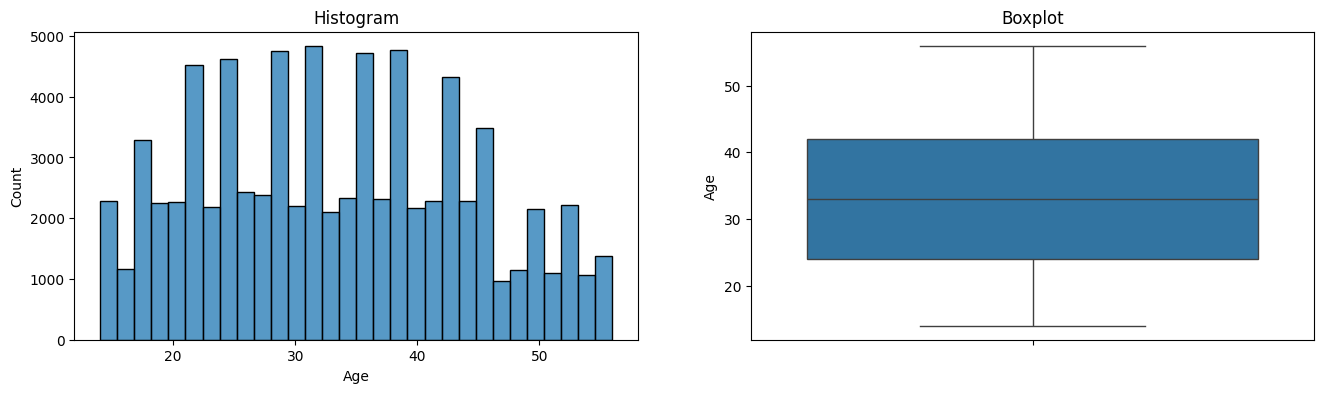


Age - After Capping


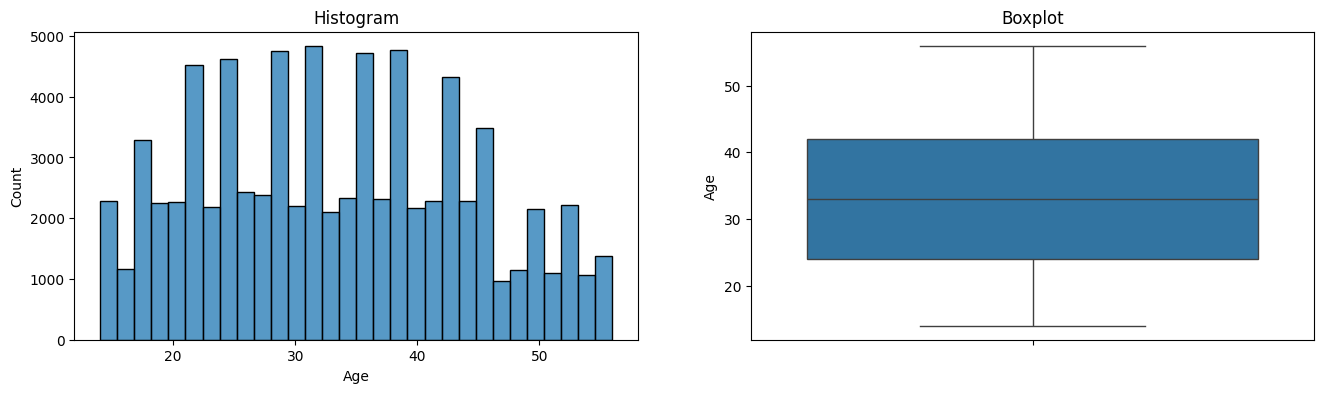

Annual_Income - Before Capping


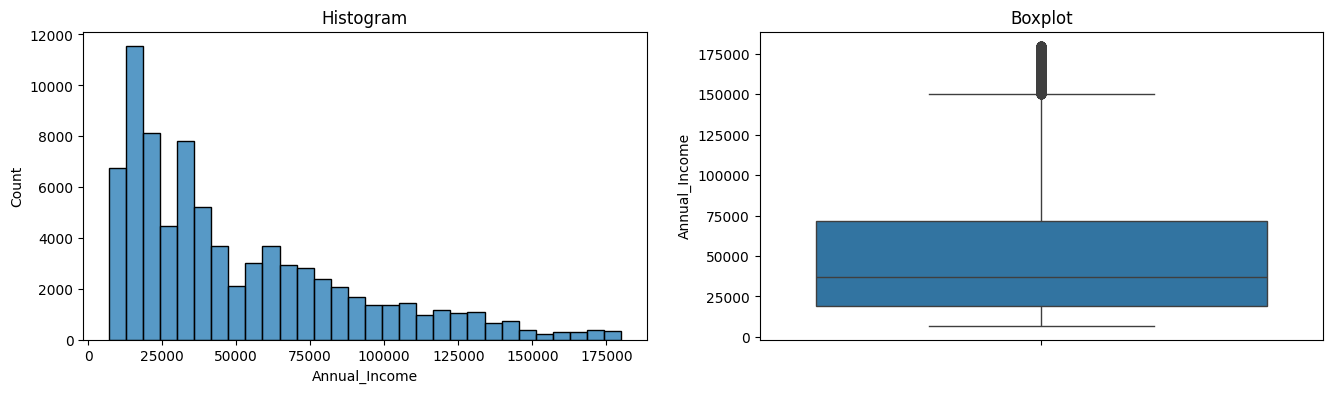


Annual_Income - After Capping


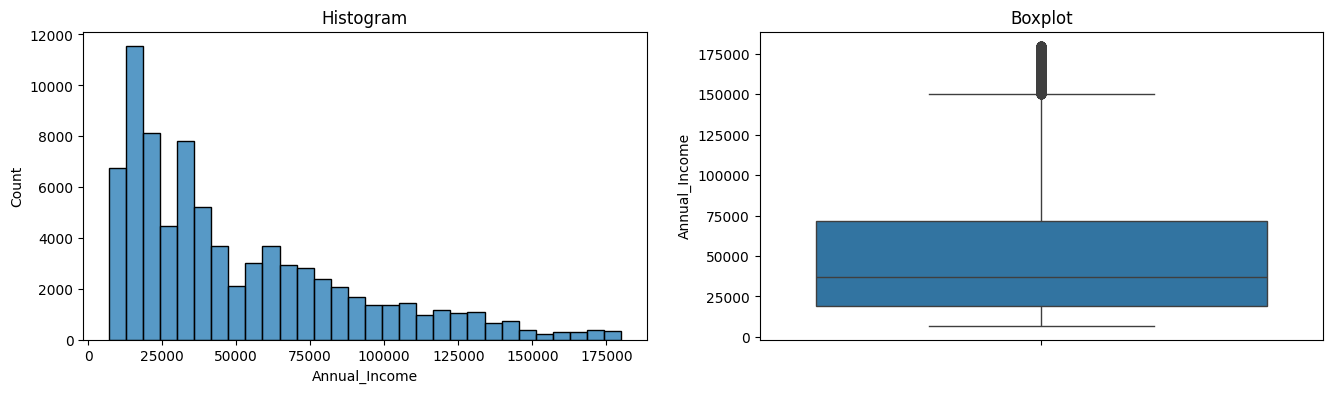

Monthly_Inhand_Salary - Before Capping


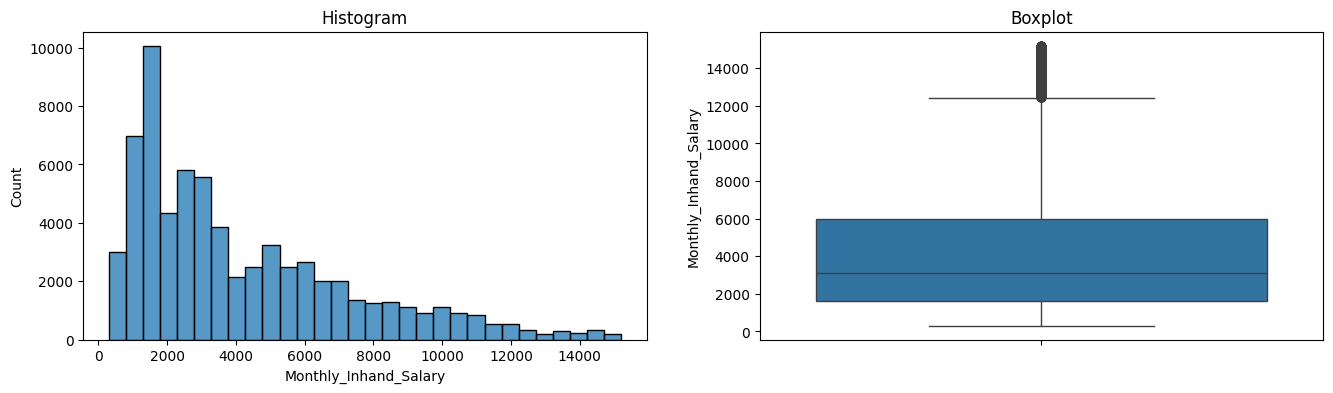


Monthly_Inhand_Salary - After Capping


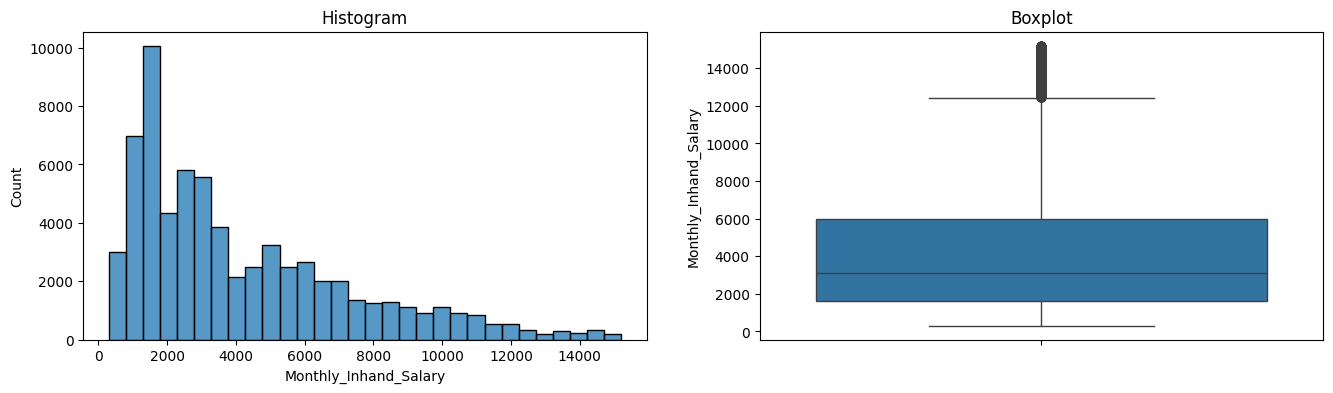

Num_Bank_Accounts - Before Capping


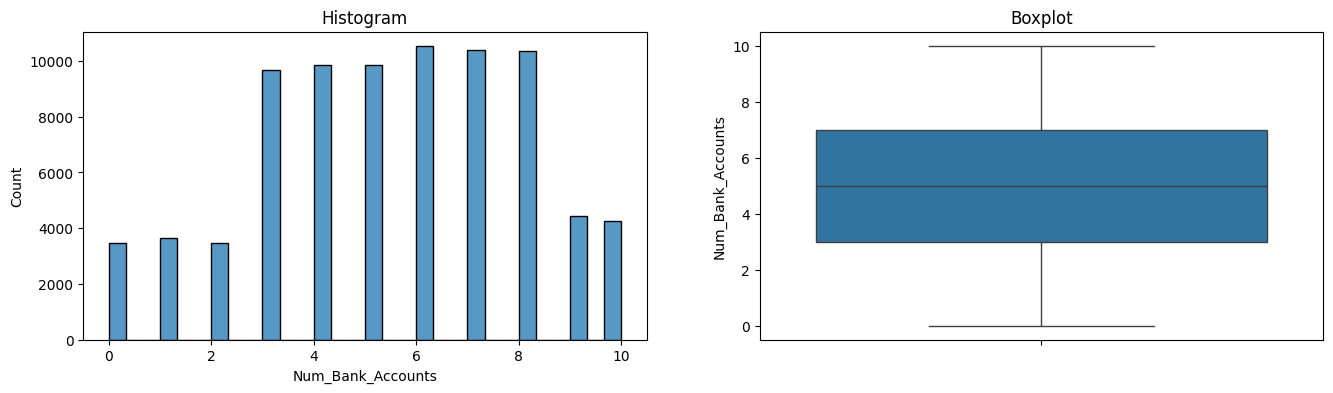


Num_Bank_Accounts - After Capping


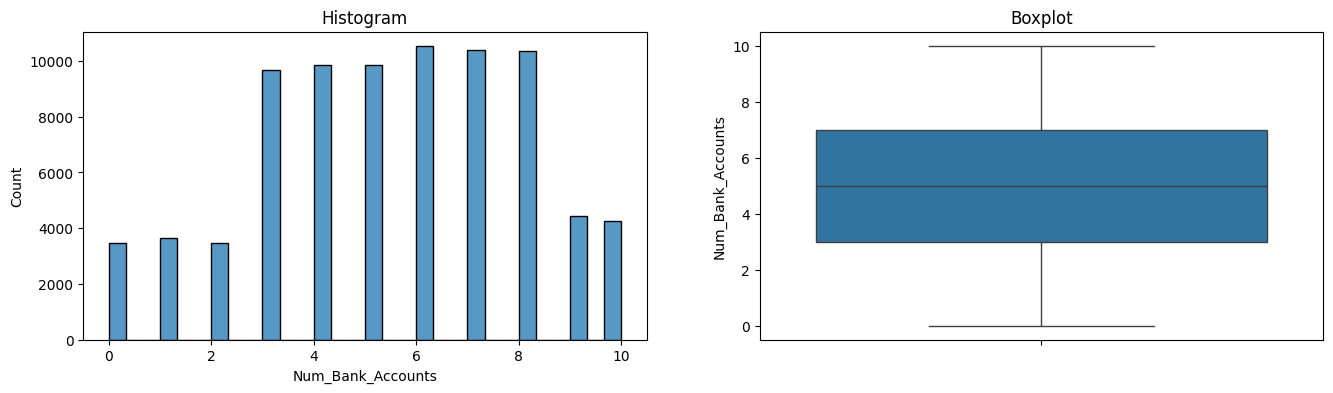

Num_Credit_Card - Before Capping


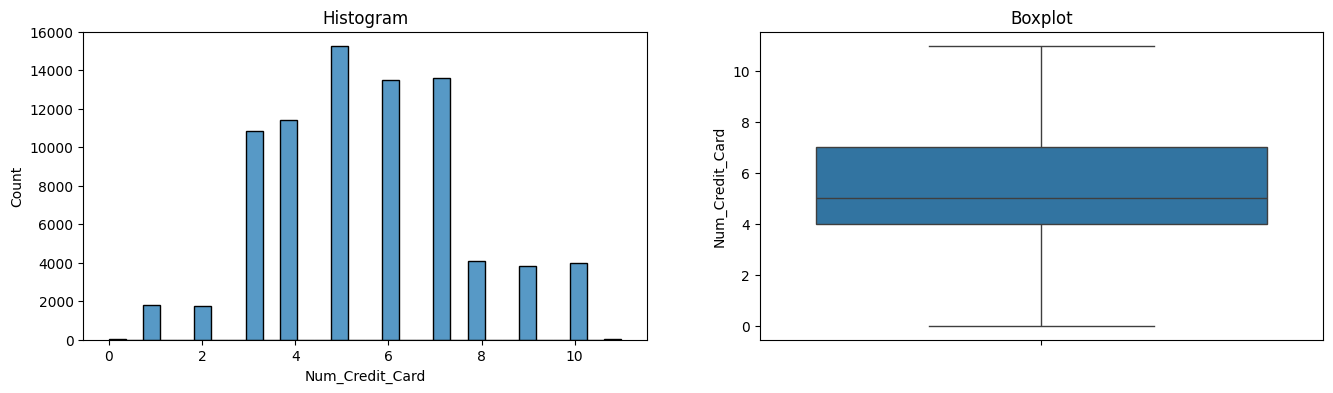


Num_Credit_Card - After Capping


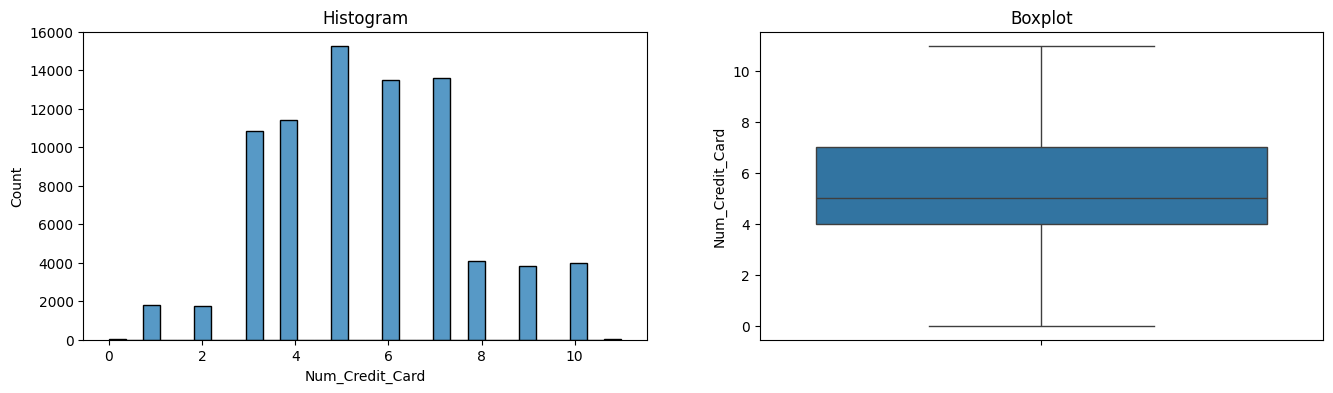

Interest_Rate - Before Capping


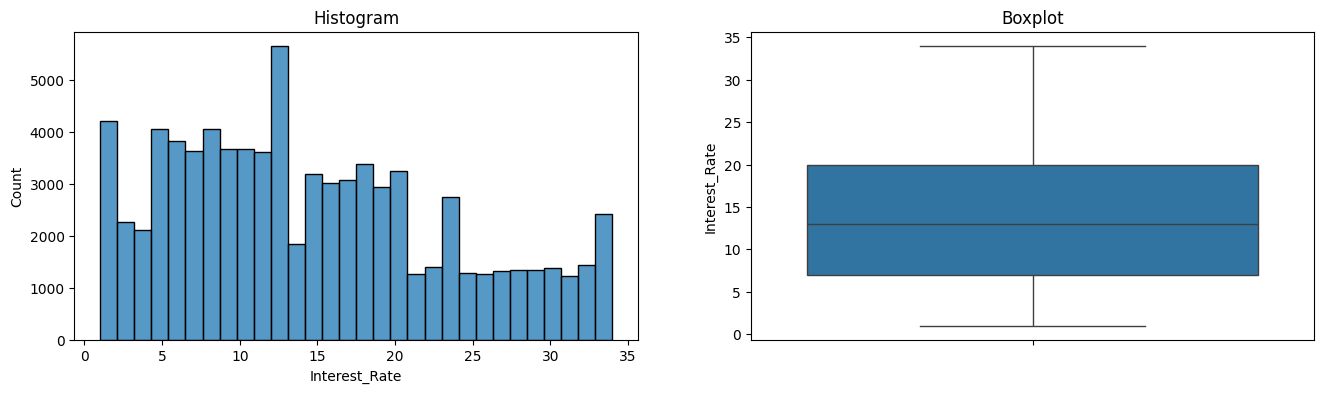


Interest_Rate - After Capping


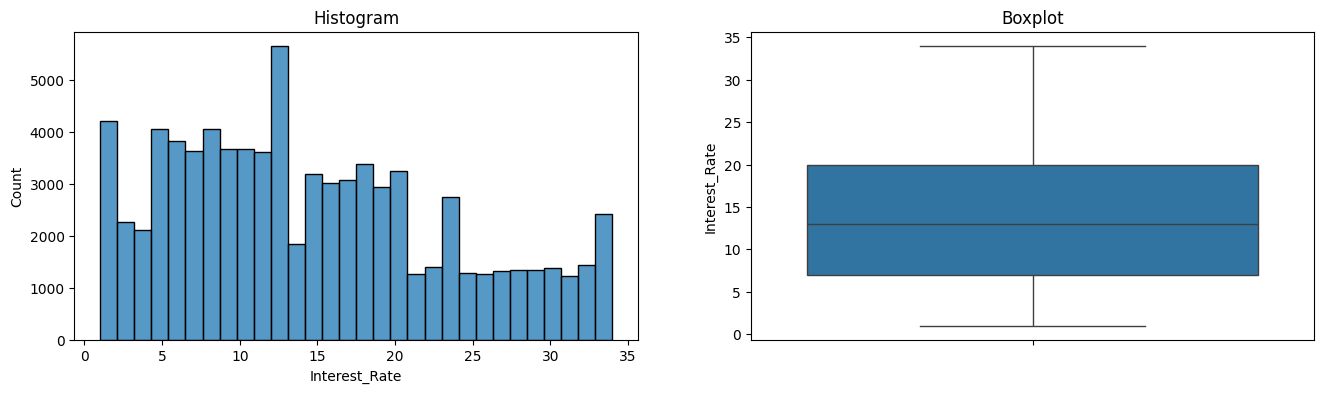

Num_of_Loan - Before Capping


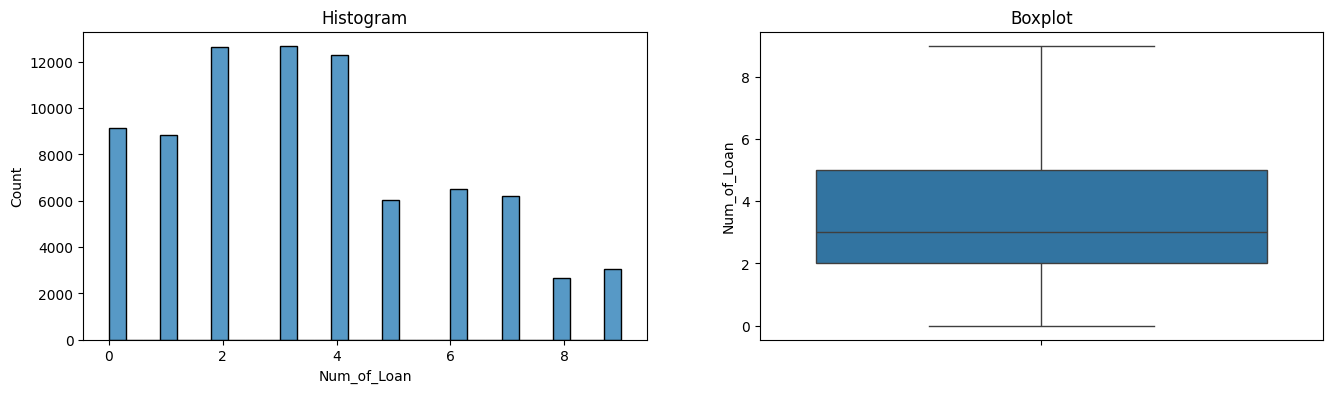


Num_of_Loan - After Capping


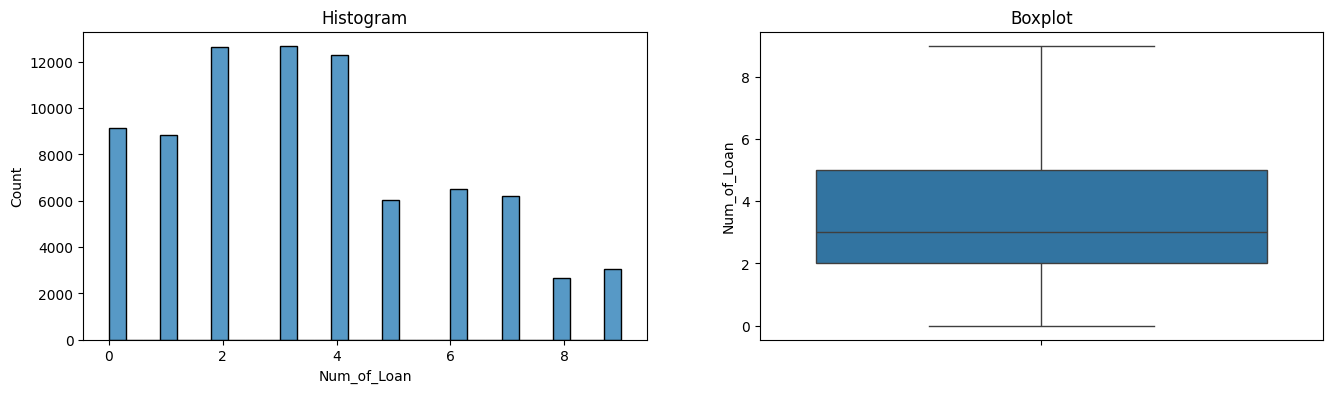

Delay_from_due_date - Before Capping


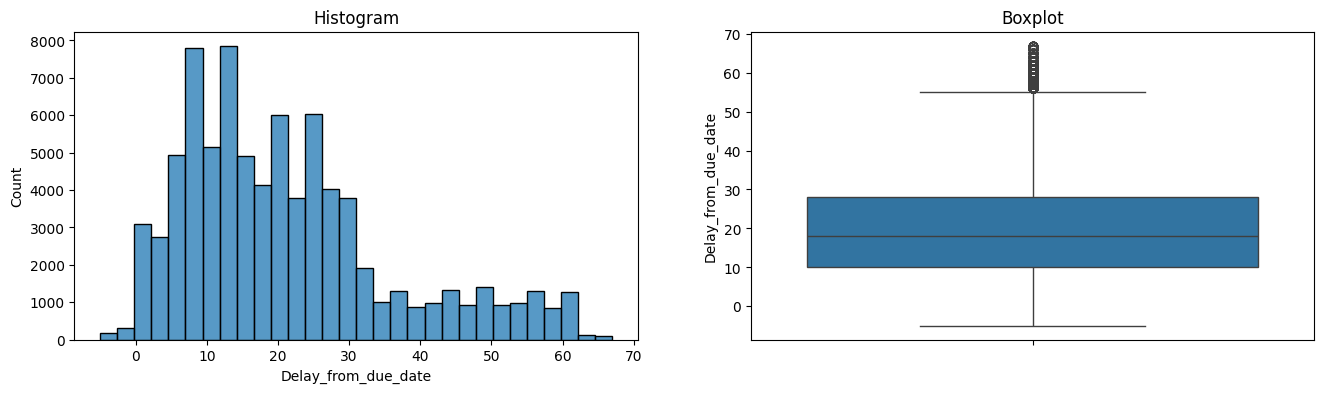


Delay_from_due_date - After Capping


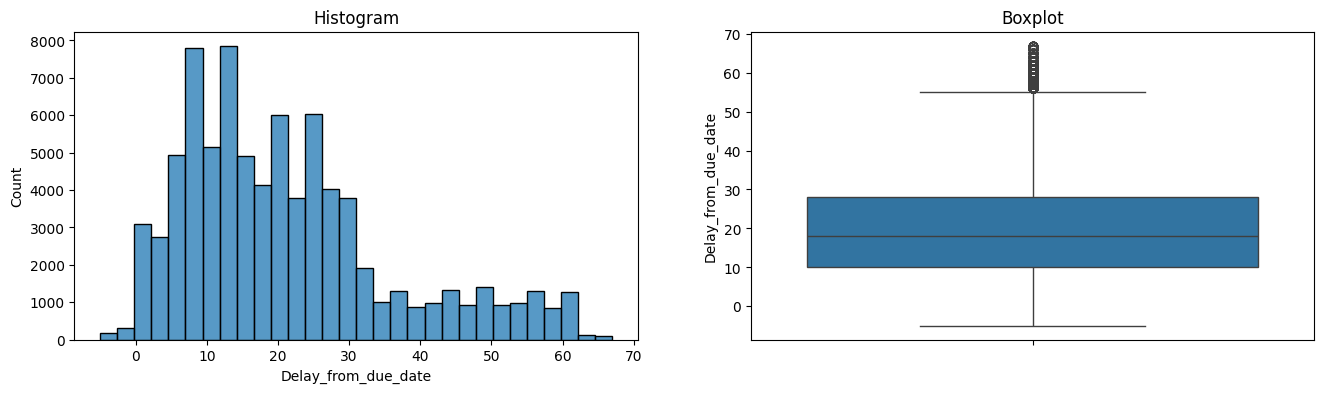

Num_of_Delayed_Payment - Before Capping


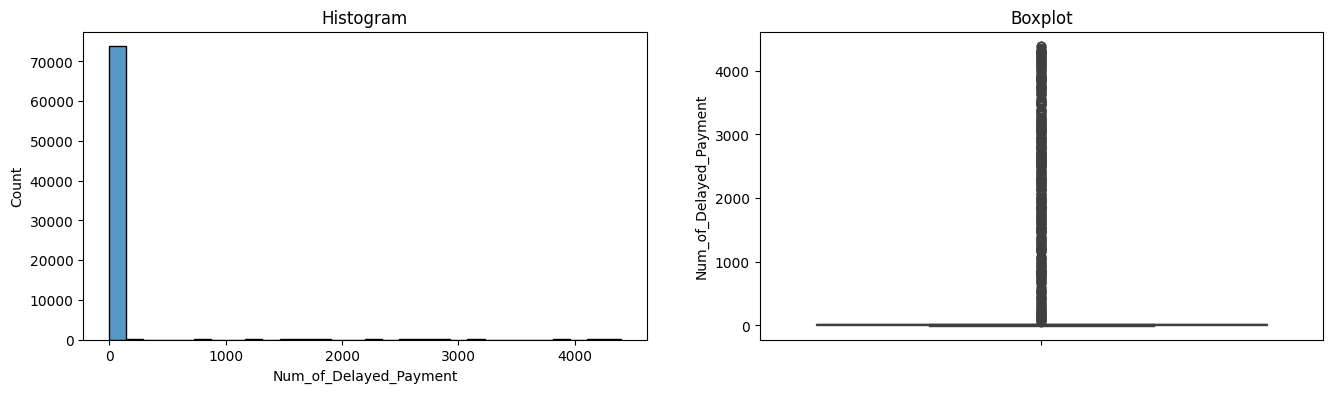


Num_of_Delayed_Payment - After Capping


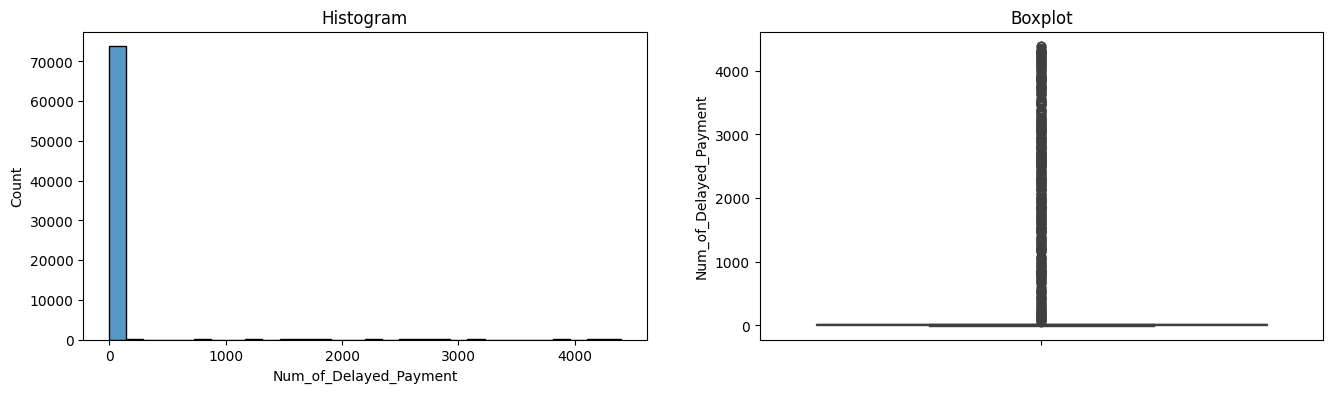

Changed_Credit_Limit - Before Capping


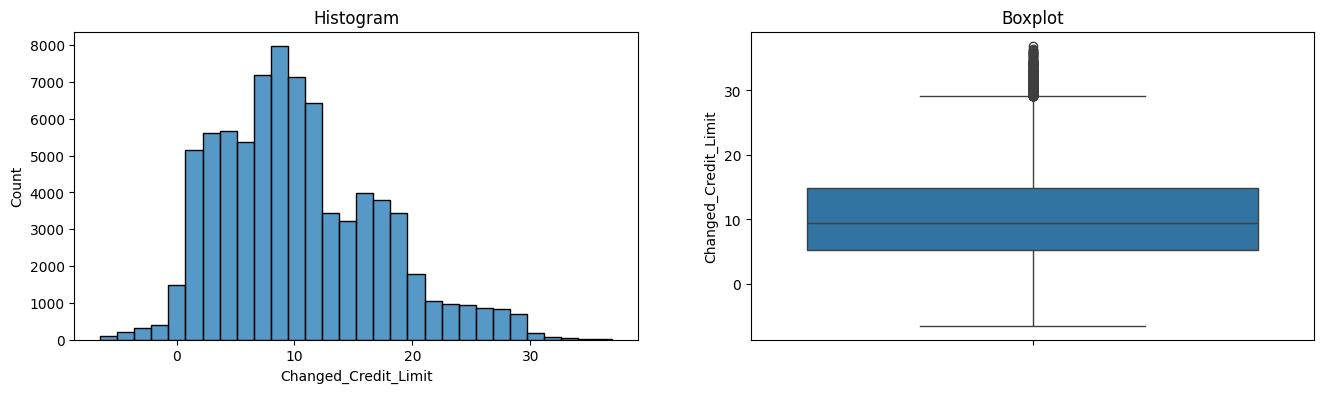


Changed_Credit_Limit - After Capping


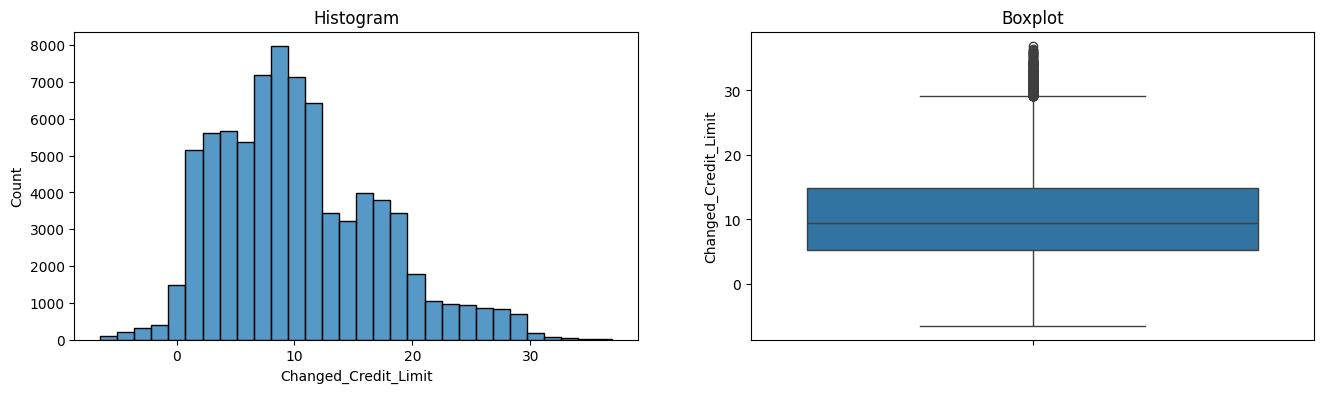

Num_Credit_Inquiries - Before Capping


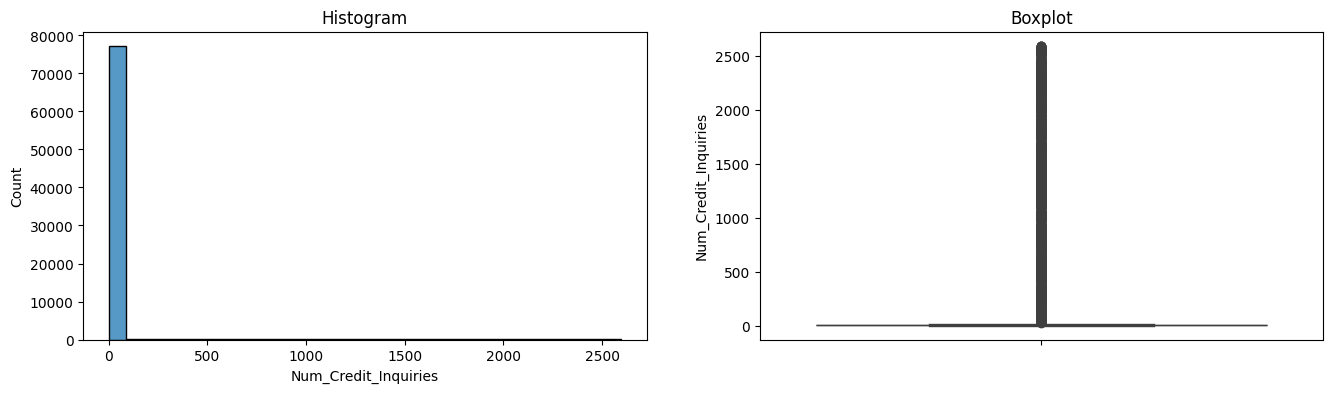


Num_Credit_Inquiries - After Capping


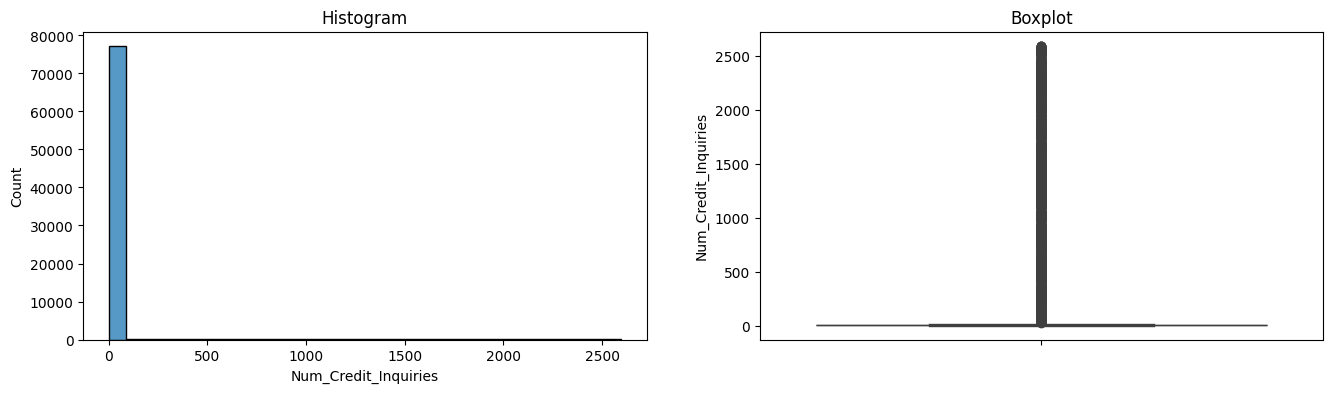

Outstanding_Debt - Before Capping


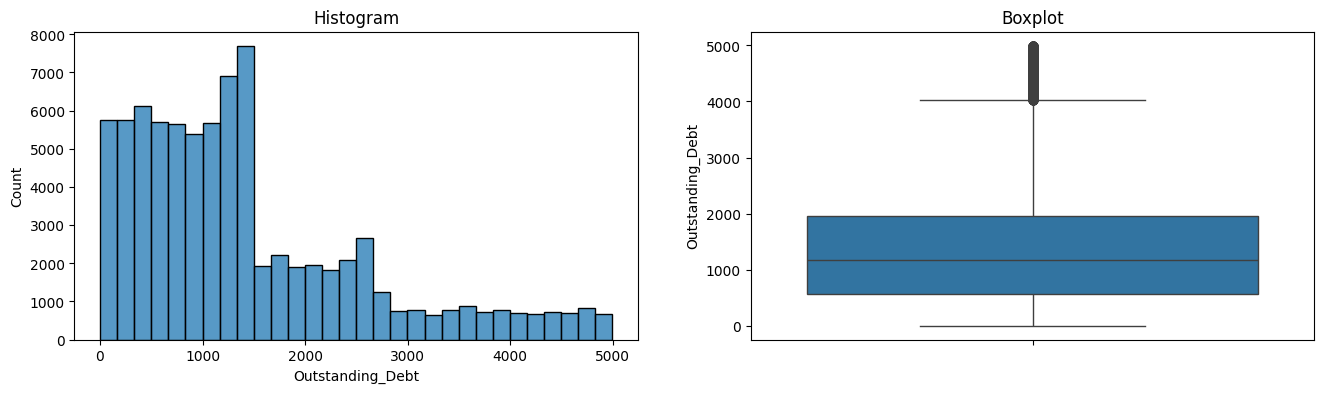


Outstanding_Debt - After Capping


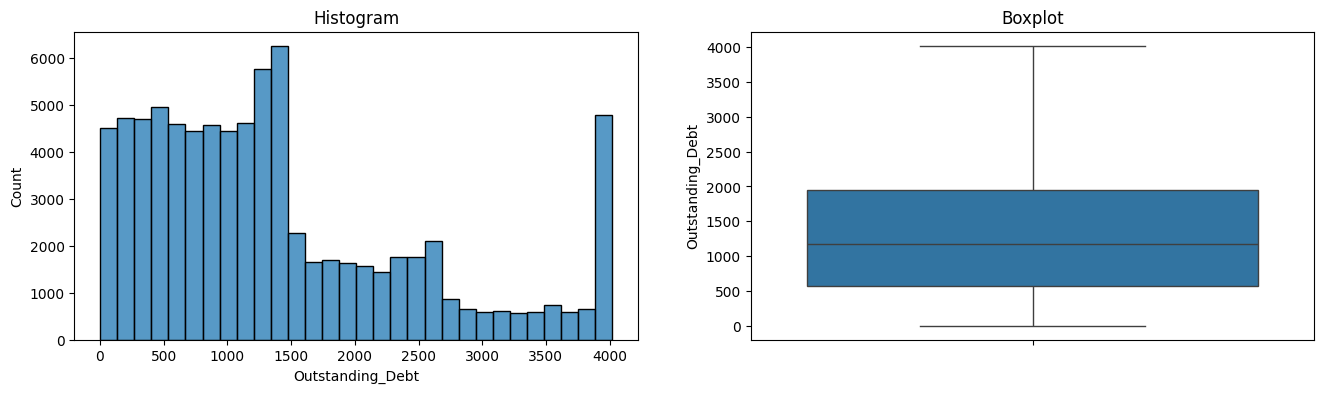

Credit_Utilization_Ratio - Before Capping


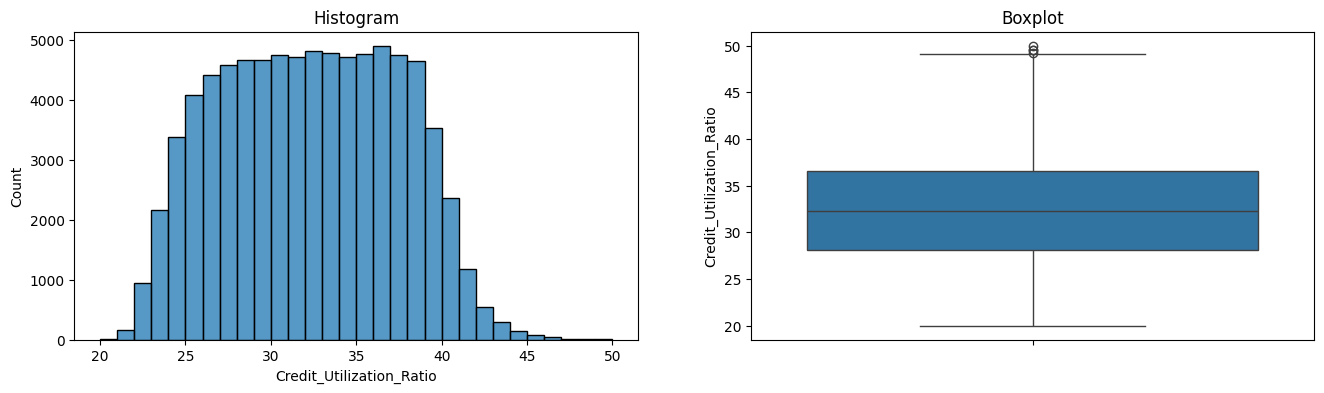


Credit_Utilization_Ratio - After Capping


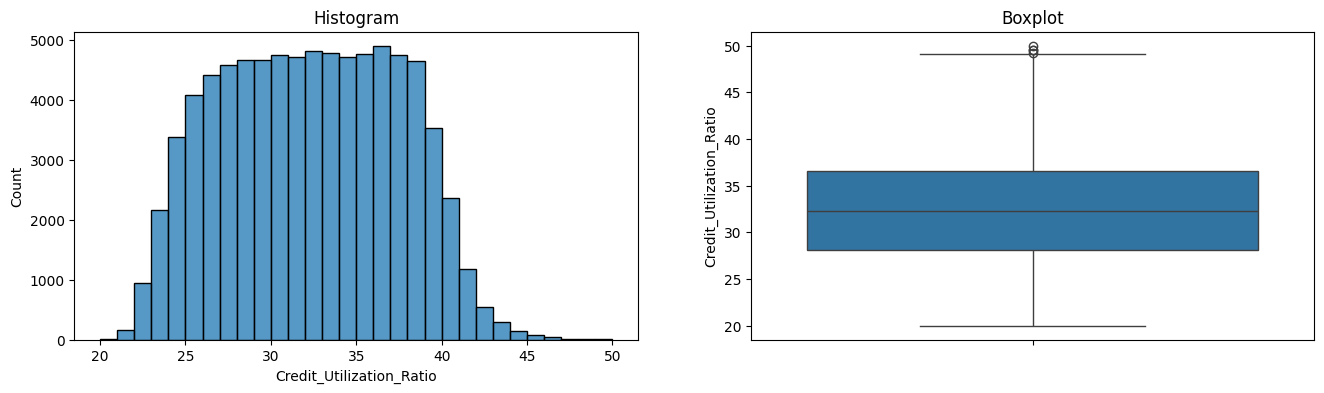

Credit_History_Age - Before Capping


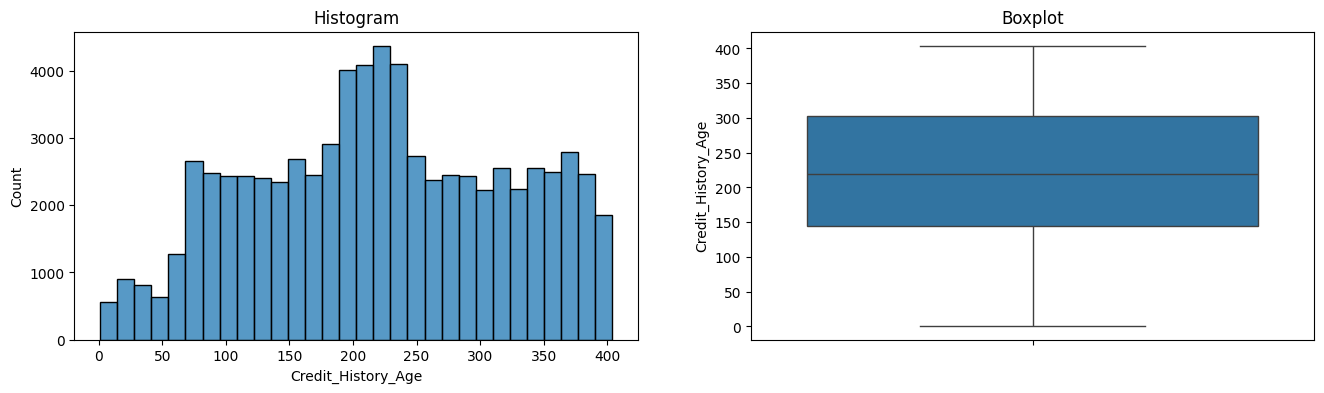


Credit_History_Age - After Capping


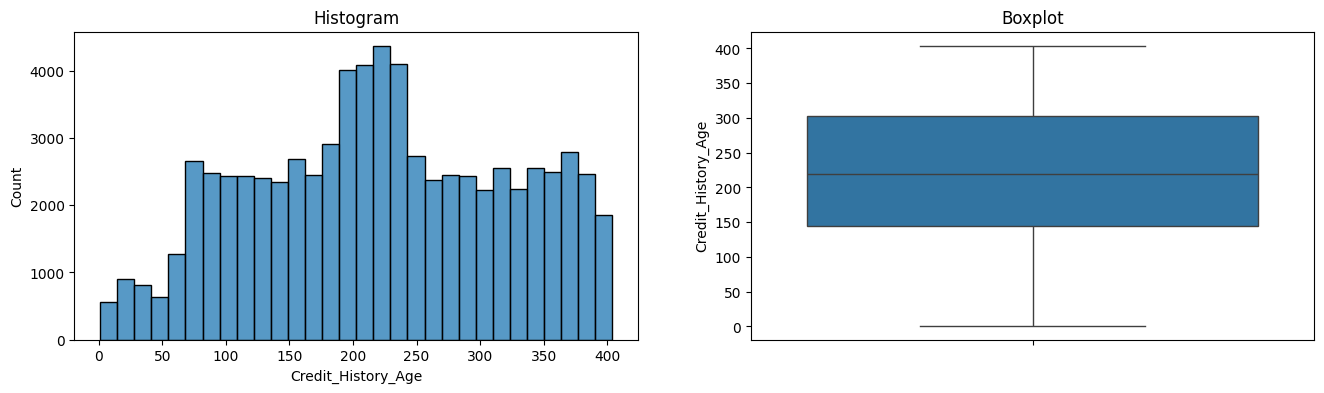

Total_EMI_per_month - Before Capping


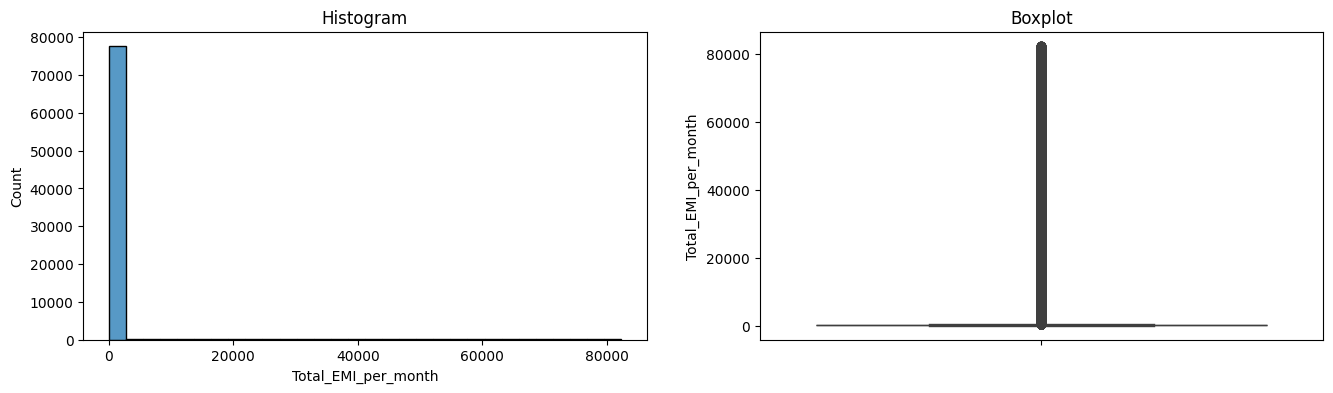


Total_EMI_per_month - After Capping


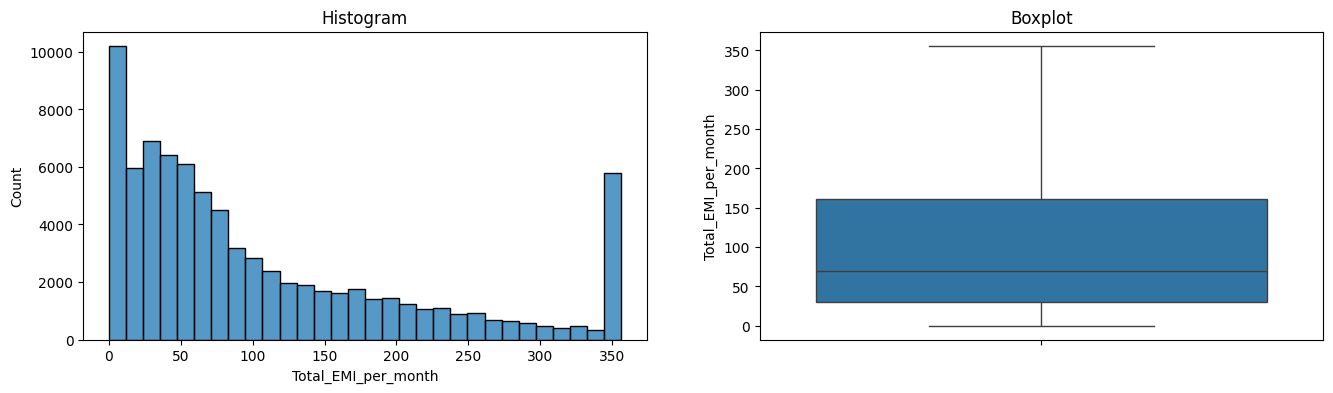

Amount_invested_monthly - Before Capping


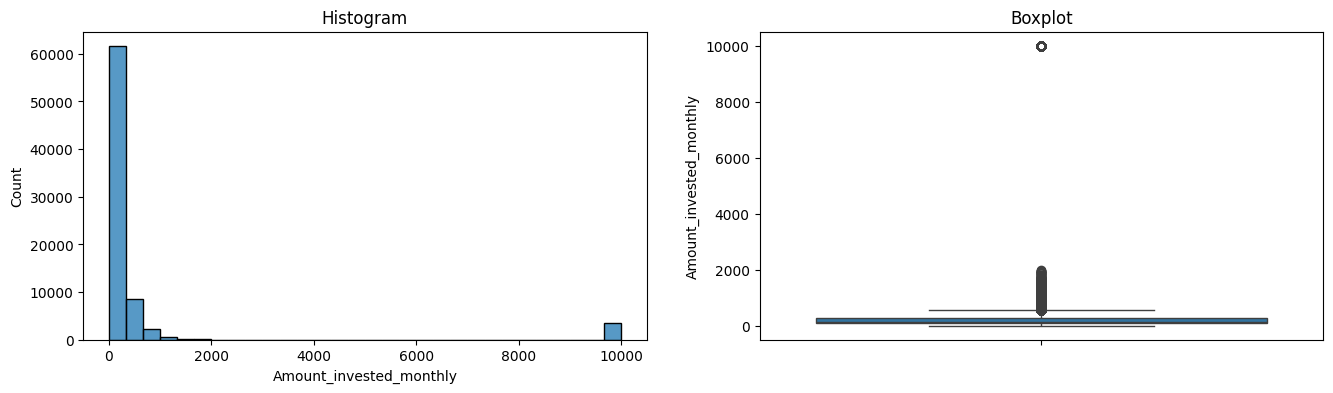


Amount_invested_monthly - After Capping


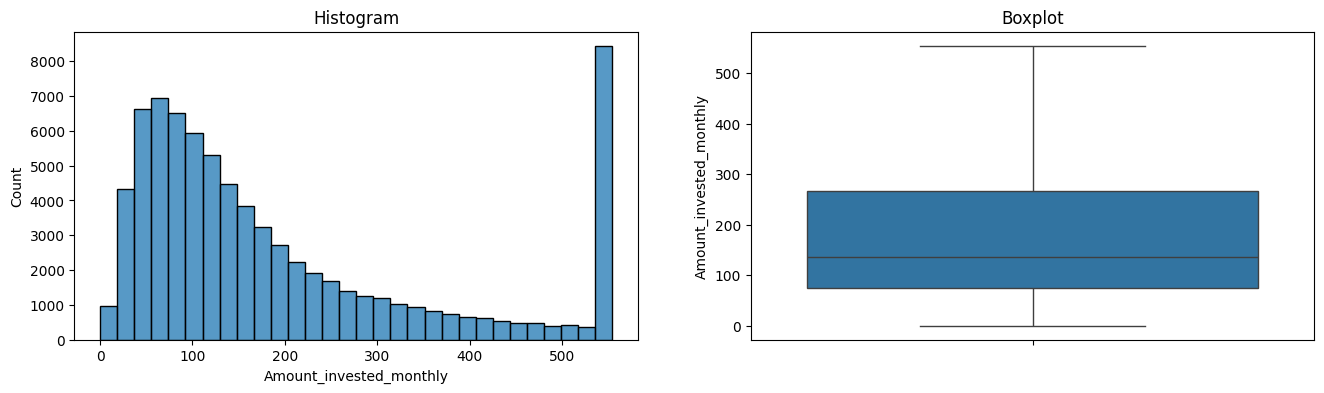

Monthly_Balance - Before Capping


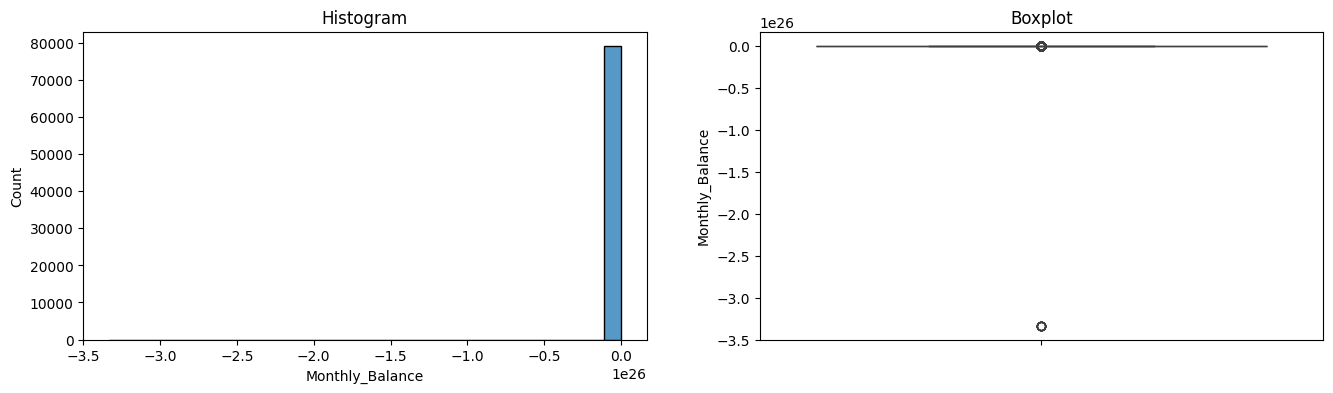


Monthly_Balance - After Capping


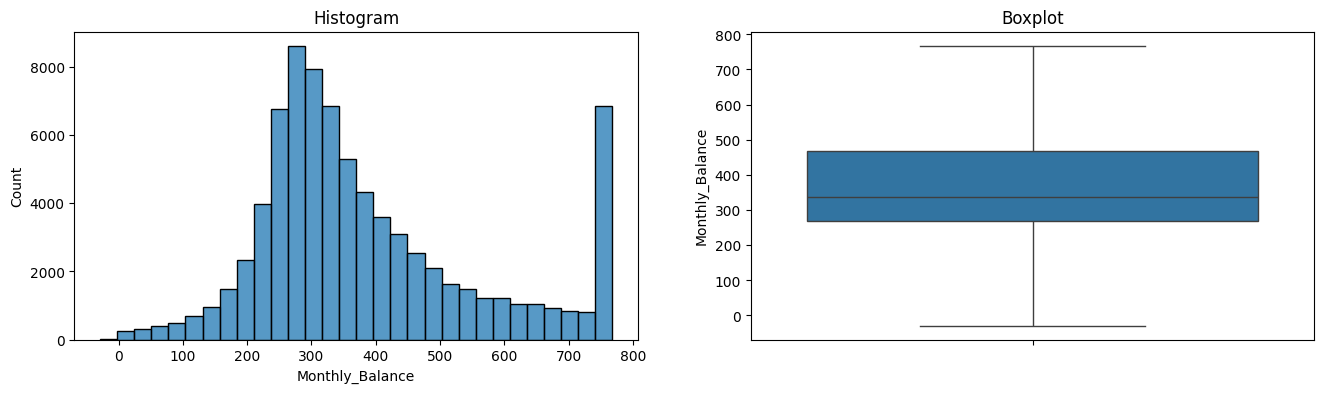

In [66]:
# Check the distribution before and after capping
for col in num_col:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train_capped, col)

## HANDLING MISSING VALUE

In [67]:
X_train_capped.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       11968
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment       5605
Changed_Credit_Limit         1664
Num_Credit_Inquiries         1589
Credit_Mix                  16165
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           7231
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      3571
Payment_Behaviour            6101
Monthly_Balance               952
dtype: int64

```
Numerical columns will be handled by inputting the median value.

Categorical columns will be handled by inputting the mode value.
```

In [68]:
X_train_capped['Monthly_Inhand_Salary'] = X_train_capped['Monthly_Inhand_Salary'].fillna(X_train_capped.Monthly_Inhand_Salary.median())
# test data follows train data
X_test_capped['Monthly_Inhand_Salary'] = X_test_capped['Monthly_Inhand_Salary'].fillna(X_train_capped.Monthly_Inhand_Salary.median())

In [69]:
X_train_capped['Num_of_Delayed_Payment'] = X_train_capped['Num_of_Delayed_Payment'].fillna(X_train_capped.Num_of_Delayed_Payment.median())
# test data follows train data
X_test_capped['Num_of_Delayed_Payment'] = X_test_capped['Num_of_Delayed_Payment'].fillna(X_train_capped.Num_of_Delayed_Payment.median())

In [70]:
X_train_capped['Changed_Credit_Limit'] = X_train_capped['Changed_Credit_Limit'].fillna(X_train_capped.Changed_Credit_Limit.median())
# test data follows train data
X_test_capped['Changed_Credit_Limit'] = X_test_capped['Changed_Credit_Limit'].fillna(X_train_capped.Changed_Credit_Limit.median())

In [71]:
X_train_capped['Num_Credit_Inquiries'] = X_train_capped['Num_Credit_Inquiries'].fillna(X_train_capped.Num_Credit_Inquiries.median())
# test data follows train data
X_test_capped['Num_Credit_Inquiries'] = X_test_capped['Num_Credit_Inquiries'].fillna(X_train_capped.Num_Credit_Inquiries.median())

In [72]:
X_train_capped['Credit_Mix'] = X_train_capped['Credit_Mix'].fillna(X_train_capped.Credit_Mix.mode()[0])
# test data follows train data
X_test_capped['Credit_Mix'] = X_test_capped['Credit_Mix'].fillna(X_train_capped.Credit_Mix.mode()[0])

In [73]:
X_train_capped['Credit_History_Age'] = X_train_capped['Credit_History_Age'].fillna(X_train_capped.Credit_History_Age.median())
# test data follows train data
X_test_capped['Credit_History_Age'] = X_test_capped['Credit_History_Age'].fillna(X_train_capped.Credit_History_Age.median())

In [74]:
X_train_capped['Amount_invested_monthly'] = X_train_capped['Amount_invested_monthly'].fillna(X_train_capped.Amount_invested_monthly.median())
# test data follows train data
X_test_capped['Amount_invested_monthly'] = X_test_capped['Amount_invested_monthly'].fillna(X_train_capped.Amount_invested_monthly.median())

In [75]:
X_train_capped['Payment_Behaviour'] = X_train_capped['Payment_Behaviour'].fillna(X_train_capped.Payment_Behaviour.mode()[0])
# test data follows train data
X_test_capped['Payment_Behaviour'] = X_test_capped['Payment_Behaviour'].fillna(X_train_capped.Payment_Behaviour.mode()[0])

In [76]:
X_train_capped['Monthly_Balance'] = X_train_capped['Monthly_Balance'].fillna(X_train_capped.Monthly_Balance.median())
# test data follows train data
X_test_capped['Monthly_Balance'] = X_test_capped['Monthly_Balance'].fillna(X_train_capped.Monthly_Balance.median())

In [77]:
X_train_capped.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

In [78]:
X_train_capped.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
44924,May,43,Doctor,32119.36,2688.613333,3,5,12,7,"Not Specified, Payday Loan, Not Specified, Cre...",...,4.0,Standard,999.25,37.593211,127.0,Yes,109.344652,105.316493,High_spent_Medium_value_payments,304.200188
57435,April,19,Entrepreneur,33189.02,2951.751667,7,3,19,3,"Mortgage Loan, Personal Loan, and Payday Loan",...,3.0,Standard,209.88,34.002146,277.0,Yes,63.716419,35.641480,High_spent_Large_value_payments,435.817267
9001,February,27,Mechanic,64720.90,5559.408333,4,4,2,3,"Home Equity Loan, Payday Loan, and Personal Loan",...,6.0,Good,1425.10,38.573424,393.0,No,112.177075,554.500655,High_spent_Small_value_payments,431.612847
83321,February,54,Entrepreneur,38933.58,3432.465000,4,7,9,3,"Mortgage Loan, Mortgage Loan, and Mortgage Loan",...,2.0,Good,149.00,31.244431,375.0,No,78.409851,393.616714,Low_spent_Small_value_payments,161.219935
75865,February,18,Manager,17896.20,3096.066250,4,5,16,1,Mortgage Loan,...,1.0,Standard,1263.91,29.519102,221.0,Yes,10.578359,75.826463,Low_spent_Small_value_payments,363.330178


## TARGET ENCODING

In [79]:
y_train.value_counts()

Credit_Score
Standard    42539
Poor        23199
Good        14262
Name: count, dtype: int64

In [80]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [81]:
y_test_encoded = label_encoder.transform(y_test)

```
Standard = 2
Poor = 1
Good = 0
```

# 6. MODEL DEFINITION

## DEFINING NUMERICAL AND CATEGORICAL COLUMNS

In [82]:
num_col = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance']
cat_nom_col = ['Month', 'Occupation', 'Type_of_Loan', 'Payment_of_Min_Amount']
cat_ord_col = ['Payment_Behaviour', 'Credit_Mix']

## PIPELINE

In [87]:
num_pipeline = make_pipeline(MinMaxScaler())

cat_nom_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

cat_ord_pipeline = make_pipeline(OrdinalEncoder(categories = [
    ['Low_spent_Small_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Large_value_payments','High_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'High_spent_Large_value_payments'],
    ['Bad','Standard','Good']
]))

preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_col),
    ('pipe_cat_nom', cat_nom_pipeline, cat_nom_col),
    ('pipe_cat_ord', cat_ord_pipeline, cat_ord_col)
])

## KNN

In [88]:
knn = make_pipeline(preprocessing_pipeline, KNeighborsClassifier())
knn.fit(X_train_capped, y_train_encoded)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Annual_Income',
                                                   'Monthly_Inhand_Salary',
                                                   'Num_Bank_Accounts',
                                                   'Num_Credit_Card',
                                                   'Interest_Rate',
                                                   'Num_of_Loan',
                                                   'Delay_from_due_date',
                                                   'Num_of_Delayed_Payment',
                                                   'Changed_Credit_Limit',
                                                   'Num_Credit_Inquiries',
                                                   'Outstandin...
                                                                   OrdinalEncoder(categories=[['Low_spent_Small_value_payments',
                                                                                               'Low_spent_Medium_value_payments',
                                                                                               'Low_spent_Large_value_payments',
                                                                                               'High_spent_Small_value_payments',
                                                                                               'High_spent_Medium_value_payments',
                                                                                               'High_spent_Large_value_payments'],
                                                                                              ['Bad',
                                                                                               'Standard',
                                                                                               'Good']]))]),
                                                  ['Payment_Behaviour',
                                                   'Credit_Mix'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

## SVC

In [89]:
svc = make_pipeline(preprocessing_pipeline, SVC(random_state=0))
svc.fit(X_train_capped, y_train_encoded)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Annual_Income',
                                                   'Monthly_Inhand_Salary',
                                                   'Num_Bank_Accounts',
                                                   'Num_Credit_Card',
                                                   'Interest_Rate',
                                                   'Num_of_Loan',
                                                   'Delay_from_due_date',
                                                   'Num_of_Delayed_Payment',
                                                   'Changed_Credit_Limit',
                                                   'Num_Credit_Inquiries',
                                                   'Outstandin...
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Low_spent_Small_value_payments',
                                                                                               'Low_spent_Medium_value_payments',
                                                                                               'Low_spent_Large_value_payments',
                                                                                               'High_spent_Small_value_payments',
                                                                                               'High_spent_Medium_value_payments',
                                                                                               'High_spent_Large_value_payments'],
                                                                                              ['Bad',
                                                                                               'Standard',
                                                                                               'Good']]))]),
                                                  ['Payment_Behaviour',
                                                   'Credit_Mix'])])),
                ('svc', SVC(random_state=0))])

## DECISION TREE

In [90]:
dtc = make_pipeline(preprocessing_pipeline, DecisionTreeClassifier(random_state=0))
dtc.fit(X_train_capped, y_train_encoded)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Annual_Income',
                                                   'Monthly_Inhand_Salary',
                                                   'Num_Bank_Accounts',
                                                   'Num_Credit_Card',
                                                   'Interest_Rate',
                                                   'Num_of_Loan',
                                                   'Delay_from_due_date',
                                                   'Num_of_Delayed_Payment',
                                                   'Changed_Credit_Limit',
                                                   'Num_Credit_Inquiries',
                                                   'Outstandin...
                                                                   OrdinalEncoder(categories=[['Low_spent_Small_value_payments',
                                                                                               'Low_spent_Medium_value_payments',
                                                                                               'Low_spent_Large_value_payments',
                                                                                               'High_spent_Small_value_payments',
                                                                                               'High_spent_Medium_value_payments',
                                                                                               'High_spent_Large_value_payments'],
                                                                                              ['Bad',
                                                                                               'Standard',
                                                                                               'Good']]))]),
                                                  ['Payment_Behaviour',
                                                   'Credit_Mix'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=0))])

## RANDOM FOREST

In [91]:
rfc = make_pipeline(preprocessing_pipeline, RandomForestClassifier(random_state=0))
rfc.fit(X_train_capped, y_train_encoded)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Annual_Income',
                                                   'Monthly_Inhand_Salary',
                                                   'Num_Bank_Accounts',
                                                   'Num_Credit_Card',
                                                   'Interest_Rate',
                                                   'Num_of_Loan',
                                                   'Delay_from_due_date',
                                                   'Num_of_Delayed_Payment',
                                                   'Changed_Credit_Limit',
                                                   'Num_Credit_Inquiries',
                                                   'Outstandin...
                                                                   OrdinalEncoder(categories=[['Low_spent_Small_value_payments',
                                                                                               'Low_spent_Medium_value_payments',
                                                                                               'Low_spent_Large_value_payments',
                                                                                               'High_spent_Small_value_payments',
                                                                                               'High_spent_Medium_value_payments',
                                                                                               'High_spent_Large_value_payments'],
                                                                                              ['Bad',
                                                                                               'Standard',
                                                                                               'Good']]))]),
                                                  ['Payment_Behaviour',
                                                   'Credit_Mix'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=0))])

## ADA BOOST

In [92]:
# abc = make_pipeline(preprocessing_pipeline, AdaBoostClassifier(estimator=SVC(random_state=0, probability=True),n_estimators=5))
# abc.fit(X_train_capped, y_train_encoded)

```
Adaboost is too time-consuming, which may be caused by the large and complex data.

The Adaboost model with n_estimators=5 took 177 minutes to complete.
```

## XG BOOST

In [93]:
xgbc = make_pipeline(preprocessing_pipeline, XGBClassifier())
xgbc.fit(X_train_capped, y_train_encoded)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Annual_Income',
                                                   'Monthly_Inhand_Salary',
                                                   'Num_Bank_Accounts',
                                                   'Num_Credit_Card',
                                                   'Interest_Rate',
                                                   'Num_of_Loan',
                                                   'Delay_from_due_date',
                                                   'Num_of_Delayed_Payment',
                                                   'Changed_Credit_Limit',
                                                   'Num_Credit_Inquiries',
                                                   'Outstandin...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

# 7. MODEL TRAINING AND EVALUATION

```
F1-Score is used to reduce false negatives and false positives in balance
```

In [119]:
models = {
  'K Nearest Neighbor' : knn,
  'SVC' : svc,
  'Decision Tree Classifier' : dtc,
  'Random forest' : rfc,
  'XG Boost' : xgbc,
  # 'Adaboost SVC' : abc
}
# metric penilaian yang digunakan
metrics = {
    'Train': f1_score,
    'Test': f1_score
}

df_model = pd.DataFrame(columns = models.keys(), index=['Train'])

for metric in metrics.keys():
  for model in models.keys():
    if metric == 'Train':
      df_model.loc[metric, model] = metrics[metric](y_train_encoded, models[model].predict(X_train_capped), average=None)
    if metric == 'Test':
      df_model.loc[metric, model] = metrics[metric](y_test_encoded, models[model].predict(X_test_capped), average=None)

In [120]:
df_model

,K Nearest Neighbor,SVC,Decision Tree Classifier,Random forest,XG Boost
Train,"[0.678489975150628, 0.7452773379128844, 0.8096...","[0.5935479781974902, 0.7276713593353334, 0.769...","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[0.6757609691540263, 0.7306758626948295, 0.780..."
Test,"[0.5140224901774827, 0.6009843237331389, 0.698...","[0.5797964755522462, 0.6987951807228916, 0.748...","[0.6189797663151895, 0.7046300302899178, 0.741...","[0.7093667931135104, 0.7779909312870597, 0.802...","[0.6449608213996217, 0.7039867415523432, 0.762..."


```
Adaboost Score
Train
[0.0, 0.03155156499118906, 0.6939394933718336]
Test
[0.0, 0.0265814266487214, 0.6934732699245655]
```

In [128]:
models = {
    'K Nearest Neighbor' : knn,
    'SVC' : svc,
    'Decision Tree Classifier' : dtc,
    'Random forest' : rfc,
    'XG Boost' : xgbc
}

# Initialize a dictionary to store the results
results = {}

# Iterate over each model and compute cross-validation scores
for name, model in models.items():
    # Cross-validation F1 score (macro or weighted)
    f1_scores = cross_val_score(model, X_train_capped, y_train_encoded, cv=5, scoring='f1_macro')
    
    # Store results in the dictionary
    results[name] = {
        "mean_f1": f1_scores.mean(),
        "std_f1": f1_scores.std()
    }

# Print the results for each model
for name, metrics in results.items():
    print(f"{name}: Average F1 Macro score = {metrics['mean_f1']:.4f}, Standard Deviation = {metrics['std_f1']:.4f}")

K Nearest Neighbor: Average F1 Macro score = 0.6013, Standard Deviation = 0.0032
SVC: Average F1 Macro score = 0.6675, Standard Deviation = 0.0056
Decision Tree Classifier: Average F1 Macro score = 0.6855, Standard Deviation = 0.0052
Random forest: Average F1 Macro score = 0.7547, Standard Deviation = 0.0055
XG Boost: Average F1 Macro score = 0.7054, Standard Deviation = 0.0067


# 8. MODEL TUNING

```
As we can see from the base model F1-score, the XGBoost model has the best result and stability, so we will tune it.
```

In [100]:
xgbc.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipe_num',
                                    Pipeline(steps=[('minmaxscaler',
                                                     MinMaxScaler())]),
                                    ['Age', 'Annual_Income',
                                     'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                                     'Num_Credit_Card', 'Interest_Rate',
                                     'Num_of_Loan', 'Delay_from_due_date',
                                     'Num_of_Delayed_Payment',
                                     'Changed_Credit_Limit',
                                     'Num_Credit_Inquiries', 'Outstanding_Debt',
                                     'Credit_Utilization_Ratio',
                                     'C...
                                   ('pipe_cat_ord',
                                    Pipeline(steps=[('ordinalencoder',
                                 

In [113]:
param_xgbc = {
    'xgbclassifier__max_depth' : [3, 5, 7],
    'xgbclassifier__learning_rate' : [0.1, 0.01, 0.001],
    'xgbclassifier__n_estimators' : [126, 57, 180, 187, 161, 80, 192, 55, 118, 63],
    'xgbclassifier__subsample' : [0.5, 0.7, 1]
}

## RANDOM SEARCH

In [123]:
random_xgbc = RandomizedSearchCV(xgbc, param_xgbc, cv=4).fit(X_train_capped, y_train_encoded)

In [124]:
best_param_xgbc = random_xgbc.best_params_
print(best_param_xgbc)
print('\n')
best_pipe_xgbc = random_xgbc.best_estimator_
print(best_pipe_xgbc)
print('\n')
result_df_xgbc = pd.DataFrame.from_dict(random_xgbc.cv_results_, orient='columns')
print(result_df_xgbc.columns)

{'xgbclassifier__subsample': 1, 'xgbclassifier__n_estimators': 192, 'xgbclassifier__max_depth': 7, 'xgbclassifier__learning_rate': 0.1}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Annual_Income',
                                                   'Monthly_Inhand_Salary',
                                                   'Num_Bank_Accounts',
                                                   'Num_Credit_Card',
                                                   'Interest_Rate',
                                                   'Num_of_Loan',
                                                   'Delay_from_due_date',
                                                   'Num_of_Delayed_Payment',
               

In [125]:
models = {
  'XG Boost Best' : best_pipe_xgbc
}
# metric penilaian yang digunakan
metrics = {
    'Train': f1_score,
    'Test': f1_score
}

df_model = pd.DataFrame(columns = models.keys(), index=['Train'])

for metric in metrics.keys():
  for model in models.keys():
    if metric == 'Train':
      df_model.loc[metric, model] = metrics[metric](y_train_encoded, models[model].predict(X_train_capped), average=None)
    if metric == 'Test':
      df_model.loc[metric, model] = metrics[metric](y_test_encoded, models[model].predict(X_test_capped), average=None)

In [126]:
df_model

,XG Boost Best
Train,"[0.6807491142230471, 0.7355577689243028, 0.784..."
Test,"[0.6396999732118939, 0.7055045871559633, 0.760..."


In [127]:
f1_scores = cross_val_score(best_pipe_xgbc, X_train_capped, y_train_encoded, cv=5, scoring='f1_macro')

# Print the average F1 score across all folds
print(f"Average F1 Macro score: {f1_scores.mean()}")
print(f"Standard Deviation F1 Macro score: {f1_scores.std()}")

Average F1 Macro score: 0.7060551221821476
Standard Deviation F1 Macro score: 0.005691886750863513


```
After performing a random search for XGBoost hyperparameter tuning, we can see that there are no significant changes.
```

## GRID SEARCH

In [114]:
grid_xgbc = GridSearchCV(xgbc, param_xgbc, cv=4).fit(X_train_capped, y_train_encoded)

In [115]:
best_param_xgbc_grid = grid_xgbc.best_params_
print(best_param_xgbc_grid)
print('\n')
best_pipe_xgbc_grid = grid_xgbc.best_estimator_
print(best_pipe_xgbc_grid)
print('\n')
result_df_xgbc_grid = pd.DataFrame.from_dict(grid_xgbc.cv_results_, orient='columns')
print(result_df_xgbc_grid.columns)

{'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 7, 'xgbclassifier__n_estimators': 192, 'xgbclassifier__subsample': 0.5}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Annual_Income',
                                                   'Monthly_Inhand_Salary',
                                                   'Num_Bank_Accounts',
                                                   'Num_Credit_Card',
                                                   'Interest_Rate',
                                                   'Num_of_Loan',
                                                   'Delay_from_due_date',
                                                   'Num_of_Delayed_Payment',
             

In [116]:
models = {
  'XG Boost Best' : best_pipe_xgbc_grid
}
# metric penilaian yang digunakan
metrics = {
    'Train': f1_score,
    'Test': f1_score
}

df_model = pd.DataFrame(columns = models.keys(), index=['Train'])

for metric in metrics.keys():
  for model in models.keys():
    if metric == 'Train':
      df_model.loc[metric, model] = metrics[metric](y_train_encoded, models[model].predict(X_train_capped), average=None)
    if metric == 'Test':
      df_model.loc[metric, model] = metrics[metric](y_test_encoded, models[model].predict(X_test_capped), average=None)

In [117]:
df_model

,XG Boost Best
Train,"[0.7250765683609209, 0.750575663410163, 0.8011..."
Test,"[0.6637506834335702, 0.7144542237546502, 0.768..."


In [118]:
f1_scores = cross_val_score(best_pipe_xgbc_grid, X_train_capped, y_train_encoded, cv=5, scoring='f1_macro')

# Print the average F1 score across all folds
print(f"Average F1 Macro score: {f1_scores.mean()}")
print(f"Standard Deviation F1 Macro score: {f1_scores.std()}")

Average F1 Macro score: 0.716688243354911
Standard Deviation F1 Macro score: 0.00484239180355471


```
Grid search, on the other hand, shows good results, as indicated by the increasing F1-score and higher model stability, with a decrease in standard deviation.
```

# 9. MODEL SAVING

In [122]:
pickle.dump(best_pipe_xgbc_grid, open('model_xgbc_grid.pkl', 'wb'))

# 10. CONCLUSION

```
In this project, we successfully developed a machine learning model that classifies individuals into credit score brackets (Good, Standard, and Poor). We evaluated six different models using the F1-score metric, which was chosen to strike a balance between false positives and false negatives.

The six models were categorized as follows:

- Traditional Algorithms: KNN, SVC, Decision Tree
- Ensemble Learning: Random Forest, ADABOOST, XGBoost

From the F1-score evaluations, we observed that KNN and SVC underfit the data, while tree-based models tended to overfit. ADABOOST proved unsuitable due to its long training time and struggles with the complexity of the data. On the other hand, XGBoost demonstrated the best performance, being well-fitted and achieving the highest F1-score among all models tested.

To further improve the XGBoost model, we conducted hyperparameter tuning using both random and grid search methods. While random search did not yield significant improvements, grid search showed positive results, with an increase in F1-score and greater model stability as evidenced by a decrease in standard deviation.

In conclusion, XGBoost, after tuning with grid search, emerged as the most reliable model for categorizing individuals into credit score brackets, achieving both high performance and stability.
```